# ***Algunas Implementaciones de Gradient-Boosting.***

## ***Universidad Central***

## ***Maestría en analítica de datos***

## ***Métodos estadísticos para analítica de datos.***

## ***Docente: Luis Andrés Campos Maldonado.***

In [1]:
# Librerias para Colab
# !pip install xgboost catboost lightgbm sweetviz

In [2]:
# Paquetes a usar.
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sweetviz import analyze
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

plt.rcParams["figure.figsize"] = (15,6)
pd.set_option("display.max_columns", None)

url_base = "https://raw.githubusercontent.com/lacamposm/Metodos-Estadisticos/main/data/"

## ***Introducción a XGBoost, LightGBM y CatBoost***

Los modelos de **Gradient Boosting** son algoritmos de aprendizaje supervisado que combinan múltiples modelos base (habitualmente árboles de decisión) para construir un modelo predictivo más fuerte. Este enfoque se basa en entrenar modelos de manera secuencial, donde cada modelo corrige los errores cometidos por los modelos anteriores.

A lo largo de los años, han surgido implementaciones optimizadas de Gradient Boosting que mejoran la velocidad, la precisión y la facilidad de uso. Entre las más populares se encuentran:

- **XGBoost (Extreme Gradient Boosting):** Reconocido por su alto rendimiento y flexibilidad.
- **LightGBM (Light Gradient Boosting Machine):** Diseñado para ser rápido y eficiente en el uso de memoria.
- **CatBoost (Categorical Boosting):** Especializado en el manejo de datos categóricos.

### ***Regularización en XGBoost, LightGBM y CatBoost***

La regularización es una técnica fundamental en aprendizaje automático para prevenir el **sobreajuste** (overfitting), que ocurre cuando un modelo se ajusta demasiado a los datos de entrenamiento y pierde la capacidad de generalizar sobre nuevos datos. Los algoritmos de Gradient Boosting, como **XGBoost**, **LightGBM** y **CatBoost**, integran diversas formas de regularización para equilibrar la complejidad del modelo y su capacidad predictiva.

#### ***¿Qué regula la regularización?***

En Gradient Boosting, la regularización actúa directamente sobre los **árboles base** y sus contribuciones al modelo final. Específicamente:

1. **Los pesos de las hojas de los árboles ($w_j$)**:  
   - Estos pesos determinan el valor predicho por cada hoja.
   - Penalizaciones como $L_{1}$ y $L_{2}$ ajustan estos pesos para reducir su magnitud o eliminarlos por completo, evitando ajustes excesivos.

2. **La estructura de los árboles (profundidad y número de hojas):**  
   - Al limitar la expansión de los árboles, la regularización previene que los árboles aprendan patrones específicos de los datos de entrenamiento que no generalizan bien.

3. **El impacto de cada árbol base $f_m(x)$ en el ensemble final:**  
   - A través del coeficiente de aprendizaje ($\nu$), se escala la contribución de cada árbol, asegurando actualizaciones más progresivas y menos propensas al sobreajuste.

#### ***Conceptos clave de regularización***

En el contexto del boosting, la regularización se introduce para controlar la **complejidad de los árboles** y el impacto de cada modelo base en el ensemble final. Las formas más comunes de regularización incluyen:

- **Penalización L1 (Lasso):**  
  Introduce un término de penalización proporcional a la suma de los valores absolutos de los pesos de las hojas:

  $$ \Omega_L = \alpha \sum_{j=1}^T |w_j|$$

  Esto fomenta que algunos pesos sean exactamente 0, eliminando hojas innecesarias y promoviendo modelos más simples.

- **Penalización L2 (Ridge):**  
  Agrega un término de penalización proporcional al cuadrado de los pesos de las hojas:
  
  $$\Omega_R = \frac{\lambda}{2} \sum_{j=1}^T w_j^2$$
  
  Esto reduce la magnitud de los pesos, suavizando las predicciones y haciendo el modelo más conservador.

## ***XGBoost (Extreme Gradient Boosting)***

**XGBoost** es una implementación avanzada de Gradient Boosting, conocida por su **alto rendimiento, precisión y flexibilidad**. Es ampliamente utilizada en competiciones de ciencia de datos y problemas del mundo real debido a su capacidad para manejar datos grandes y complejos.

#### ***Características principales:***
1. **Regularización avanzada:**
   - XGBoost utiliza penalizaciones para controlar la complejidad de los árboles y evitar el sobreajuste, promoviendo modelos más simples y generalizables.

2. **Optimización eficiente:**
   - Implementa cálculos paralelos, lo que acelera el entrenamiento en comparación con otras herramientas.

3. **Control de la estructura de los árboles:**
   - Limita el crecimiento de los árboles, asegurando que no sean excesivamente complejos y puedan generalizar mejor.

#### ***Ventajas:***
- **Precisión:** Ofrece resultados muy exactos gracias a sus técnicas avanzadas de regularización.
- **Escalabilidad:** Es capaz de manejar grandes conjuntos de datos de manera eficiente.
- **Flexibilidad:** Permite personalizar la función de pérdida y trabajar con diferentes tipos de datos.

#### ***Limitaciones:***
- Puede ser más lento que otras herramientas en conjuntos de datos extremadamente grandes.
- Requiere un ajuste cuidadoso de hiperparámetros para obtener su máximo potencial.

#### ***Cuándo usar XGBoost:***
- Para problemas que requieren alta precisión.
- En tareas donde el control y ajuste de los parámetros son cruciales.
- En competiciones de ciencia de datos o proyectos complejos.


#### ***Hiperparámetros de XGBoost y consejos de su uso***

Configurar los hiperparámetros de XGBoost de manera adecuada es crucial para obtener un modelo óptimo. Aunque el ajuste depende del problema específico, existen valores iniciales recomendados y estrategias comunes para lograr un buen desempeño.


##### ***Hiperparámetros principales***

1. ***`learning_rate` (Coeficiente de aprendizaje):***
   - Controla el impacto de cada árbol base en el modelo final.
   - ***Recomendación:*** Usar un valor pequeño como `0.01` o `0.1` y aumentar el número de árboles (`n_estimators`).
   - ***Consejo:*** Si se requiere mayor velocidad de entrenamiento, valores más altos como `0.2` o `0.3` pueden ser utilizados, pero existe mayor riesgo de sobreajuste.

2. ***`max_depth` (Profundidad máxima):***
   - Determina la profundidad máxima de los árboles base, controlando la complejidad del modelo.
   - ***Recomendación:*** 
     - Usar valores pequeños (`3` a `6`) para conjuntos de datos pequeños o con ruido.
     - Valores mayores (`6` a `10`) pueden funcionar mejor para datos grandes, aunque aumentan el riesgo de sobreajuste.

3. ***`n_estimators` (Número de árboles):***
   - Define cuántos árboles base se ajustarán secuencialmente.
   - ***Recomendación:*** 
     - Comenzar con un valor alto (`100` a `500`) si se usa un `learning_rate` bajo.
     - Utilizar validación cruzada para determinar el número óptimo.

4. ***`subsample` (Tasa de muestreo):***
   - Especifica la fracción de datos utilizados para construir cada árbol.
   - ***Recomendación:*** 
     - Valores entre `0.7` y `0.9` suelen funcionar bien.
     - Reducir este valor ayuda a prevenir el sobreajuste.

5. ***`colsample_bytree` (Columnas por árbol):***
   - Fracción de características consideradas al construir cada árbol.
   - ***Recomendación:*** 
     - Valores entre `0.5` y `0.8` equilibran precisión y tiempo de entrenamiento.

6. ***`reg_alpha` (Regularización L1):***
   - Controla la penalización L1, promoviendo modelos más esparsos.
   - ***Recomendación:*** 
     - Comenzar con valores bajos (`0` a `1`) y aumentar si hay sobreajuste.

7. ***`reg_lambda` (Regularización L2):***
   - Controla la penalización L2, reduciendo la magnitud de los pesos de las hojas.
   - ***Recomendación:*** 
     - Valores moderados (`1` a `10`) suelen ser efectivos.

8. ***`gamma` (Penalización por división):***
   - Requiere que las divisiones superen un umbral mínimo de ganancia.
   - ***Recomendación:*** 
     - Valores iniciales de `0` (sin penalización) y aumentar si se detecta sobreajuste.


#### ***Estrategia para el ajuste de hiperparámetros***

1. ***Comenzar con valores predeterminados:***
   - XGBoost tiene configuraciones predeterminadas robustas para muchos problemas.
   - Ajustar primero `learning_rate`, `max_depth`, y `n_estimators`.

2. ***Validación cruzada:***
   - Utilizar validación cruzada para evaluar el rendimiento en diferentes configuraciones de hiperparámetros.

3. ***Grid Search o Random Search:***
   - Implementar búsquedas sistemáticas (`GridSearchCV`) o aleatorias (`RandomizedSearchCV`) para explorar combinaciones de hiperparámetros.

4. ***Experimentar con datos grandes:***
   - Reducir `subsample` y `colsample_bytree` para acelerar el entrenamiento y evitar sobreajuste.

## ***Ejemplo 1.***

In [3]:
# Importamos el DataSet.
df = pd.read_csv(url_base + "kc_house_data.csv",)
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

                                             |          | [  0%]   00:00 -> (? left)


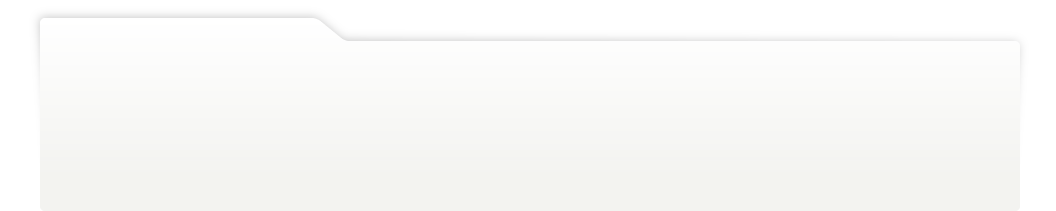
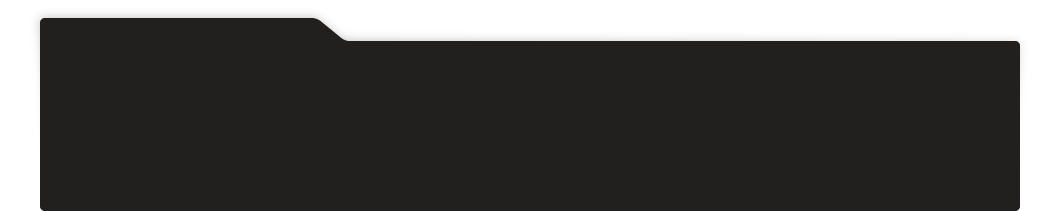
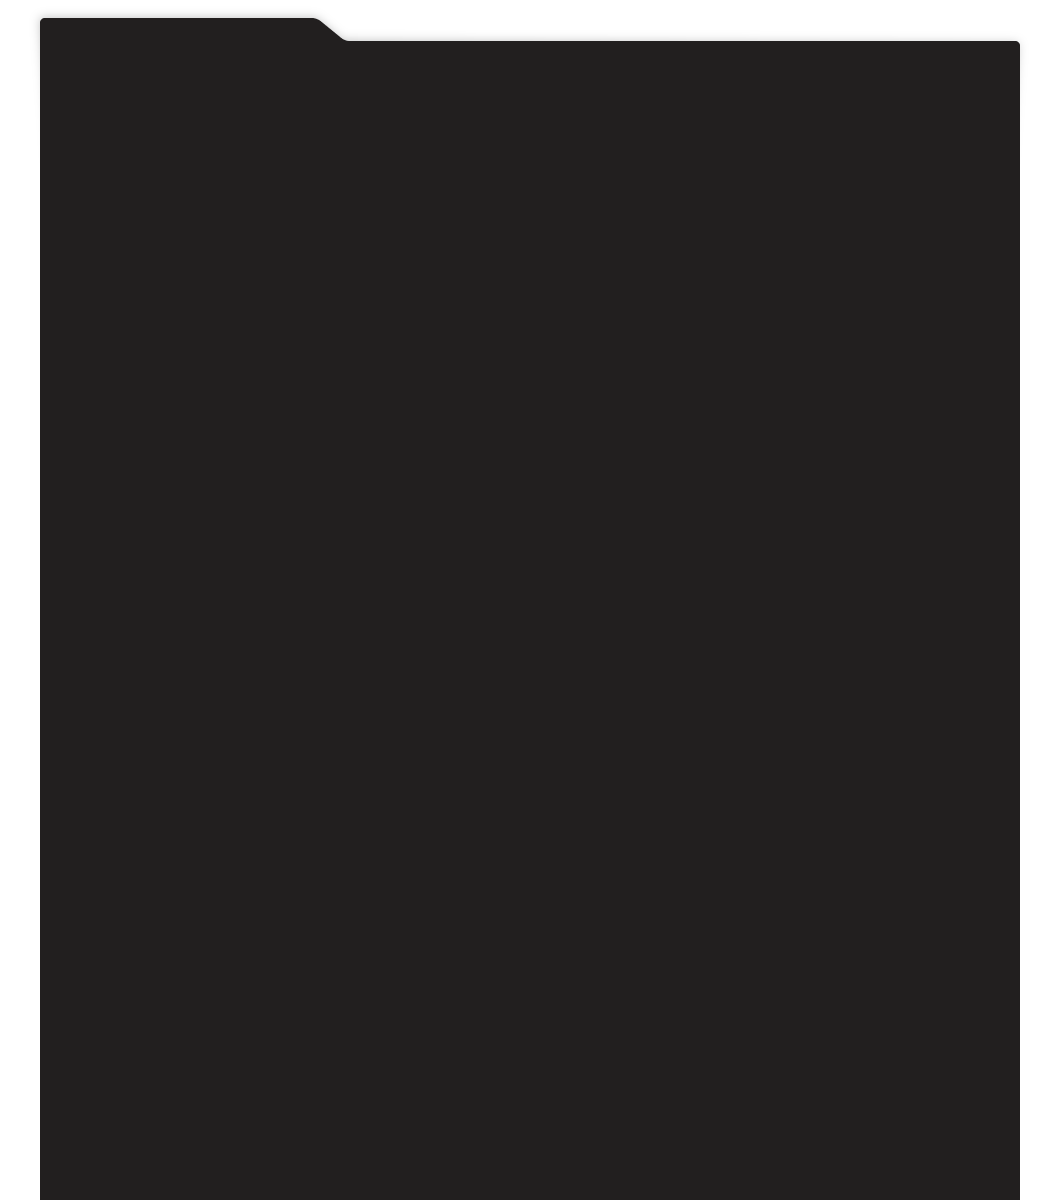
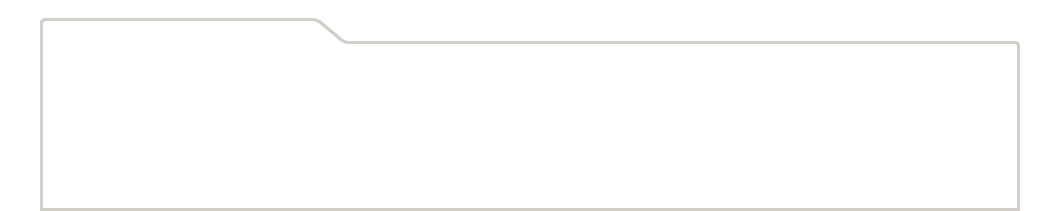
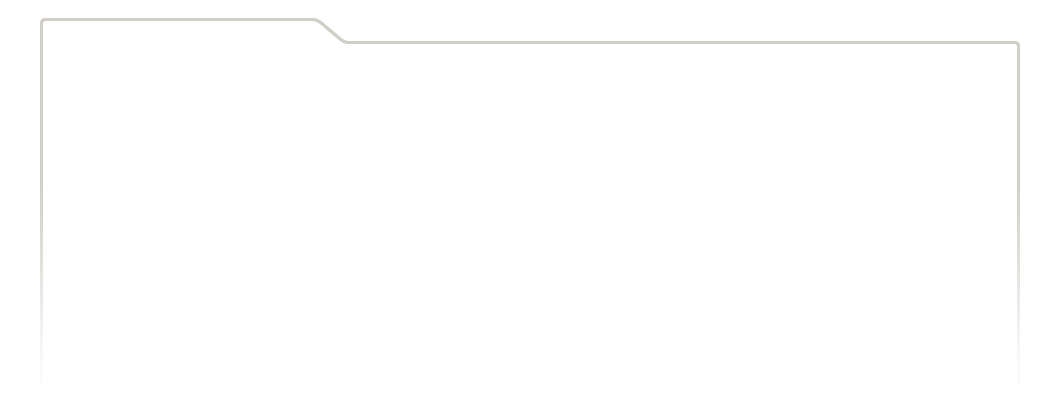
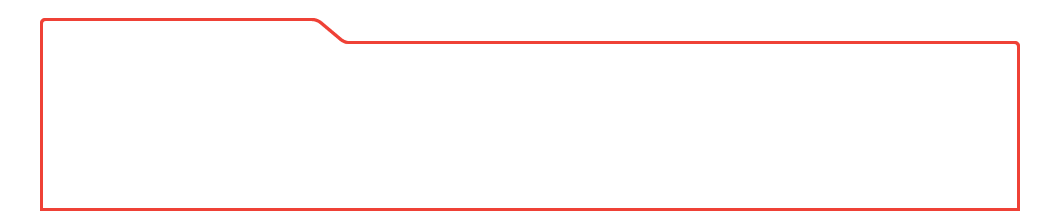
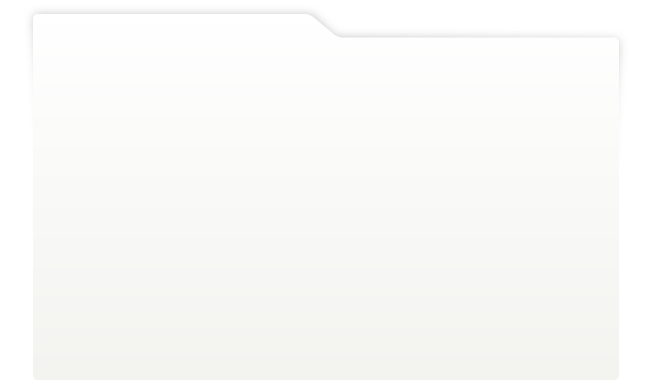
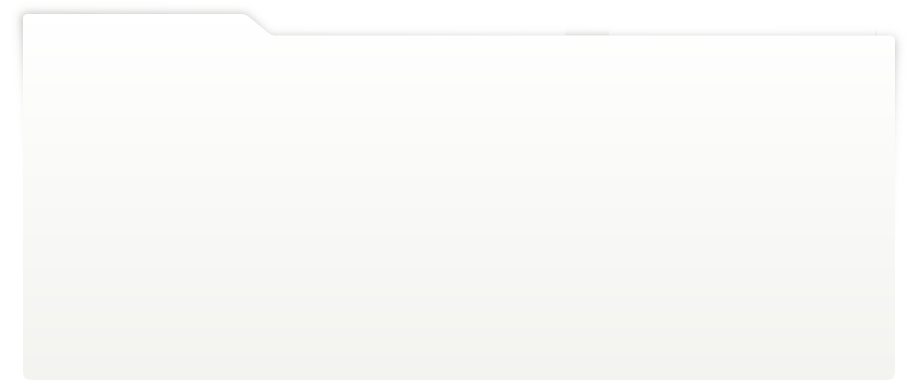
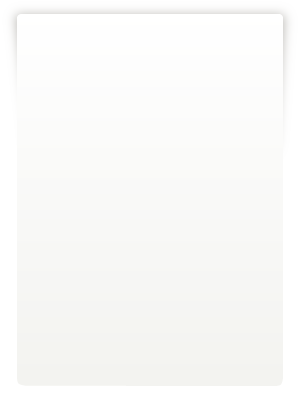
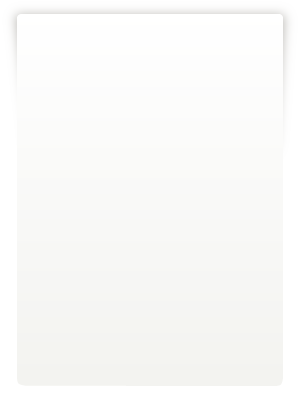
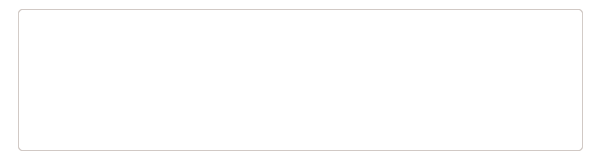
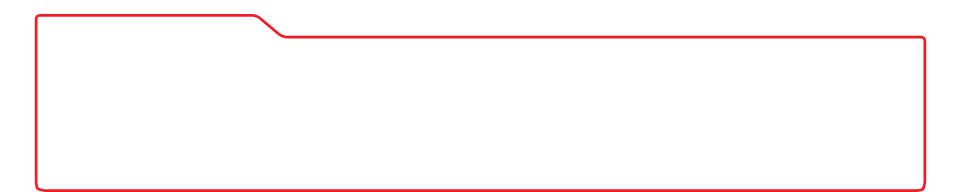
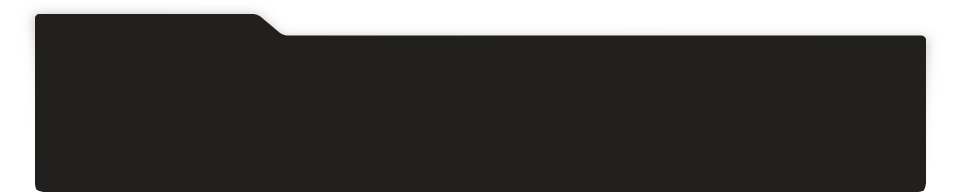
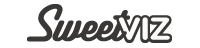
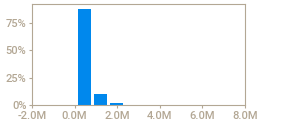
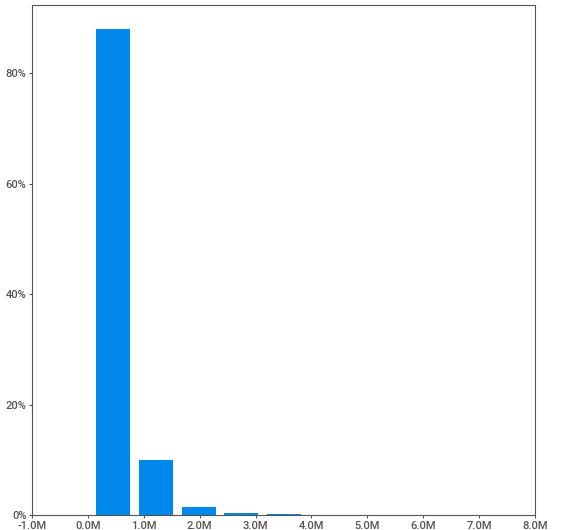
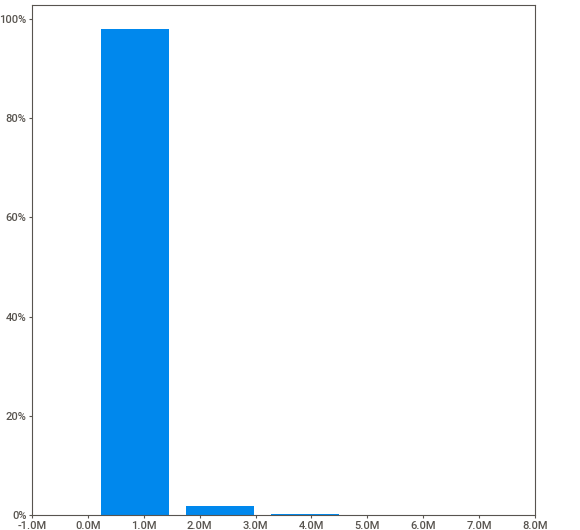
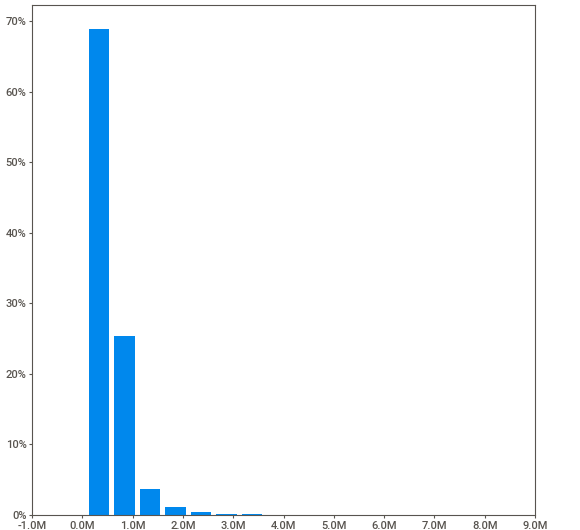
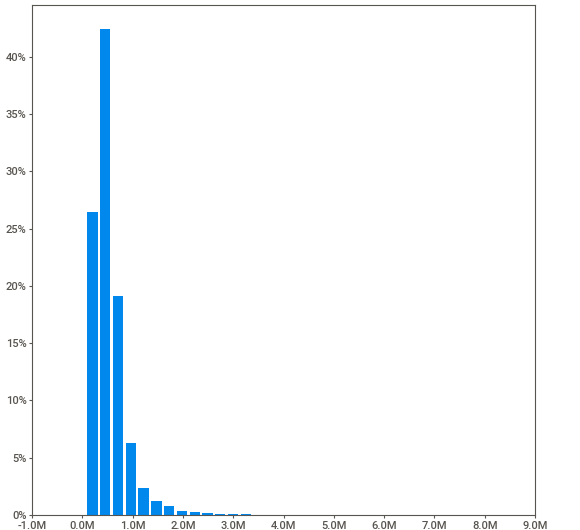
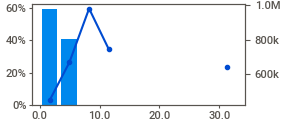
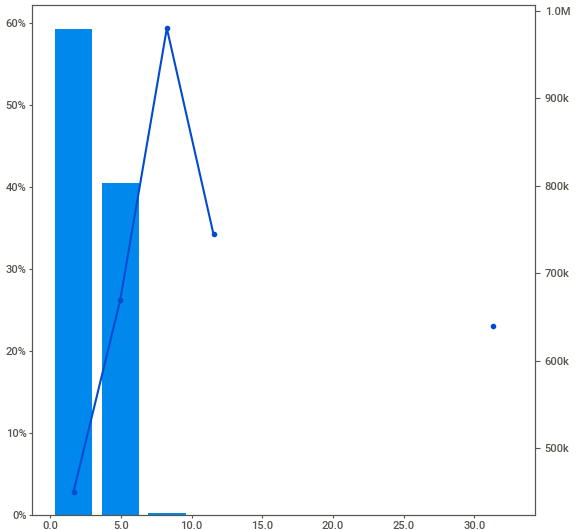
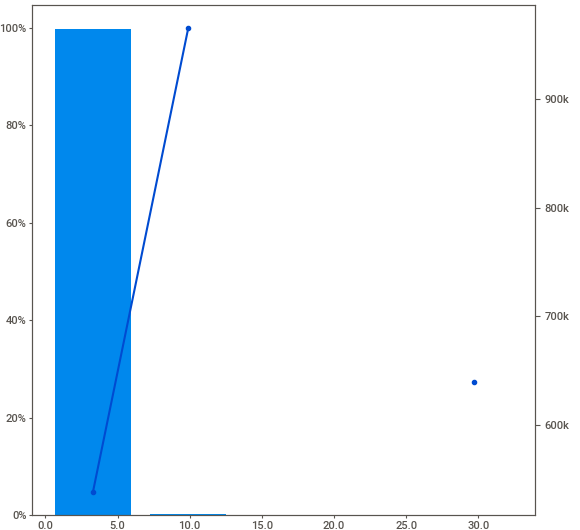
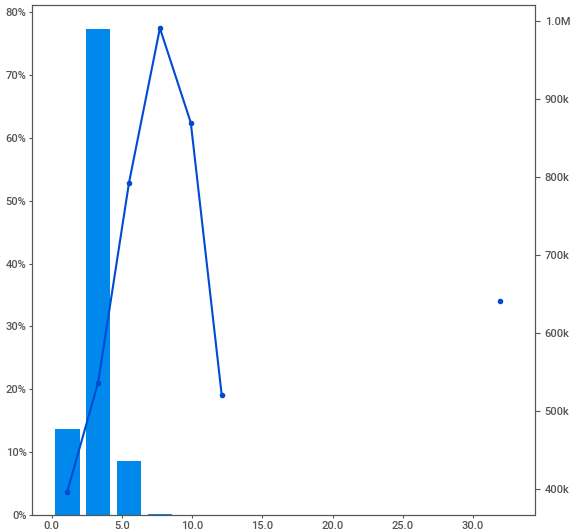
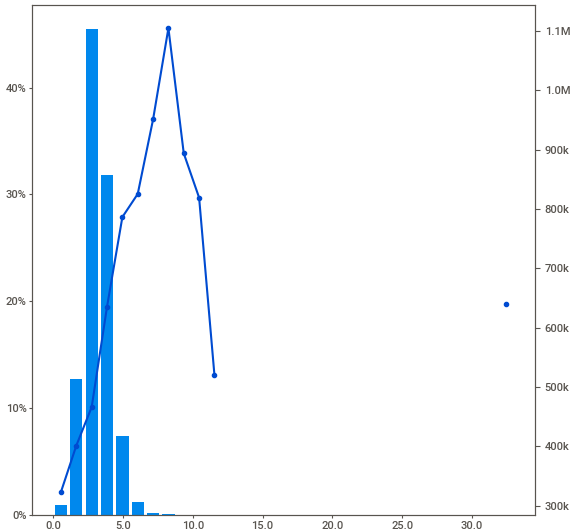
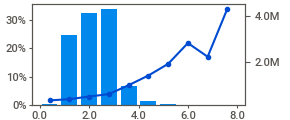
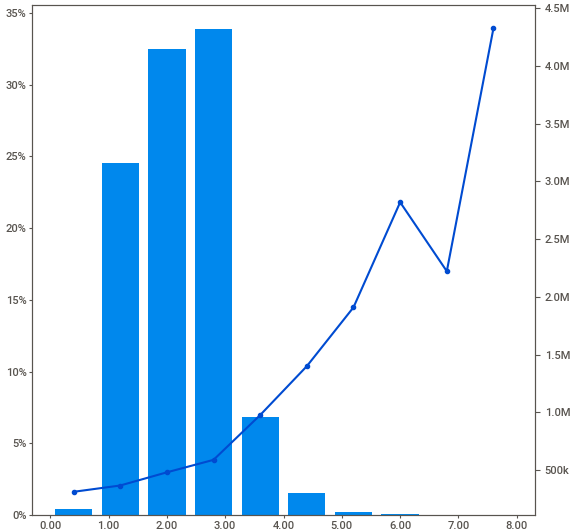
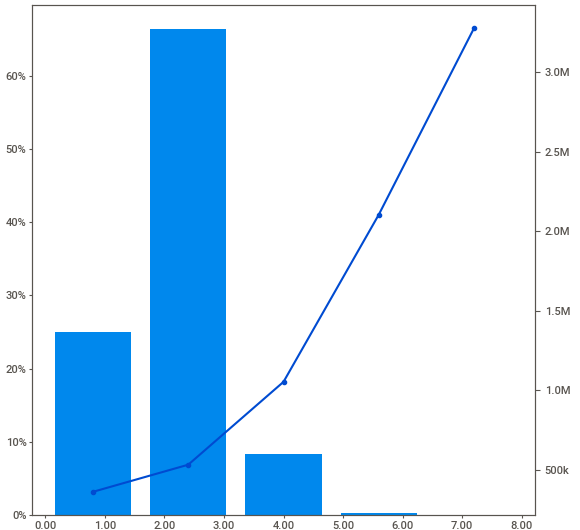
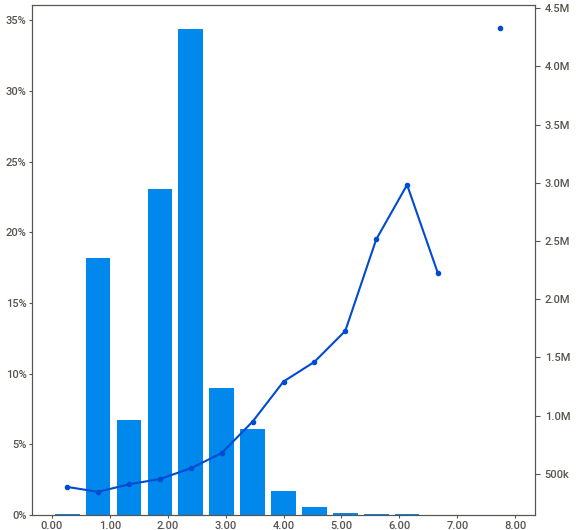
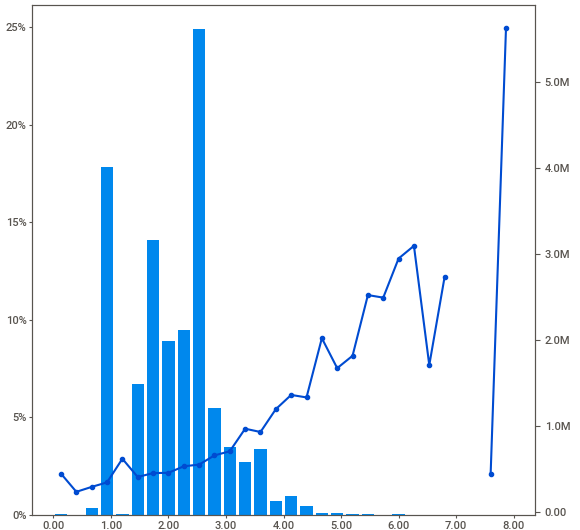
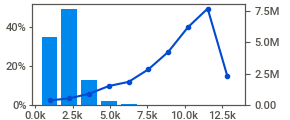
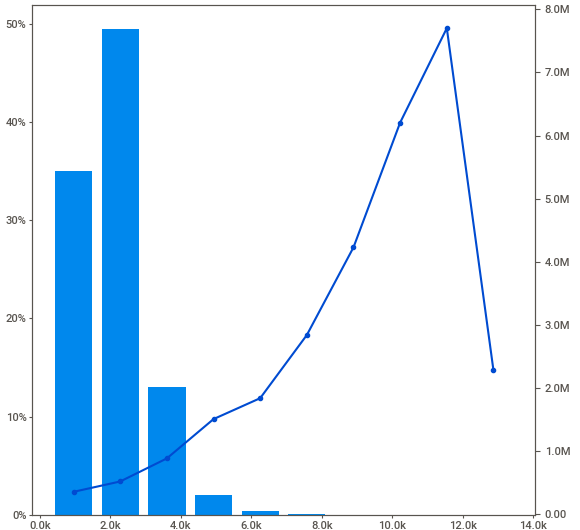
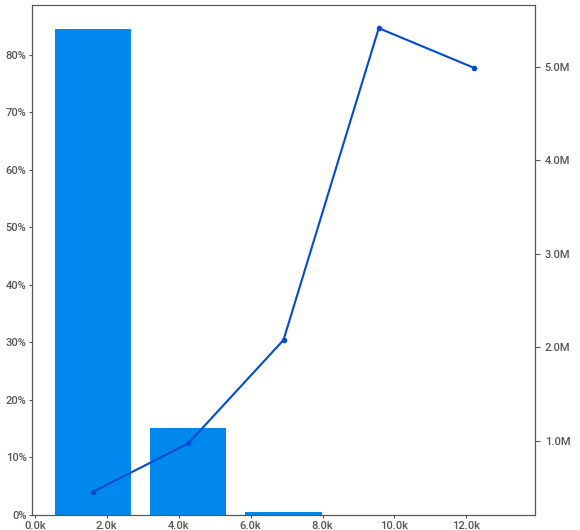
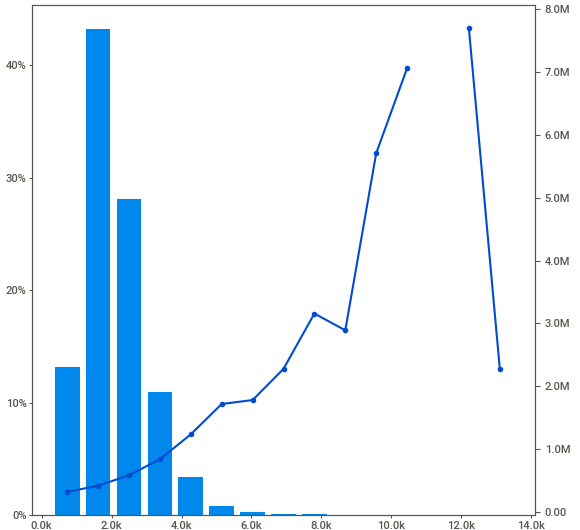
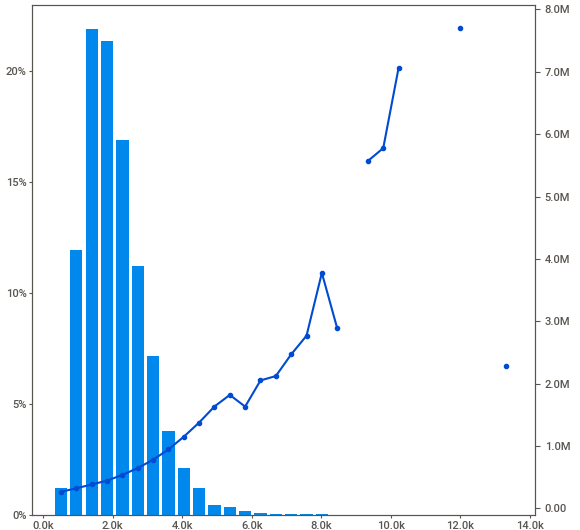
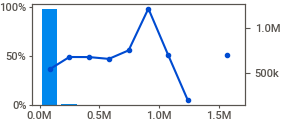
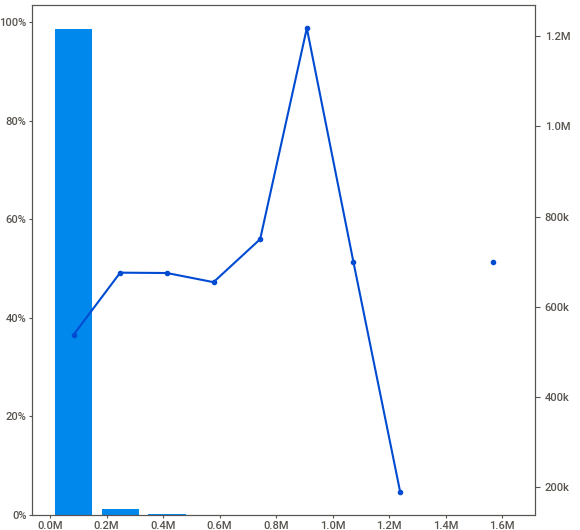
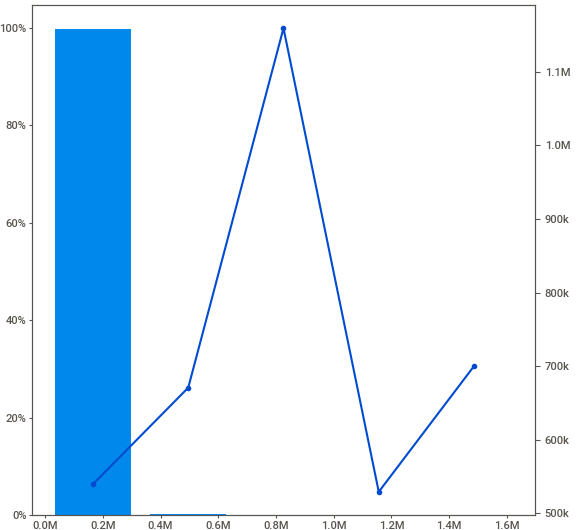
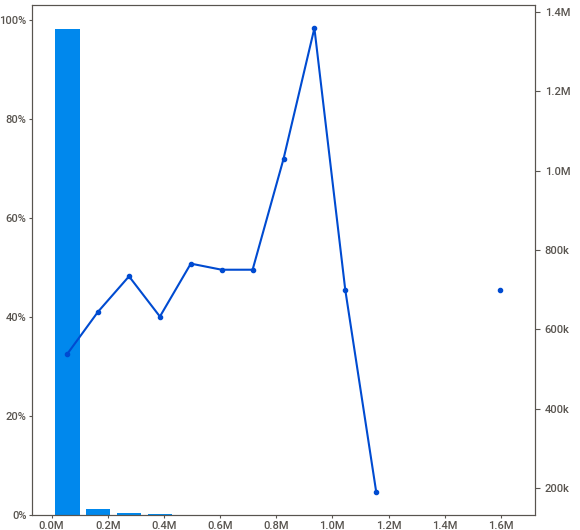
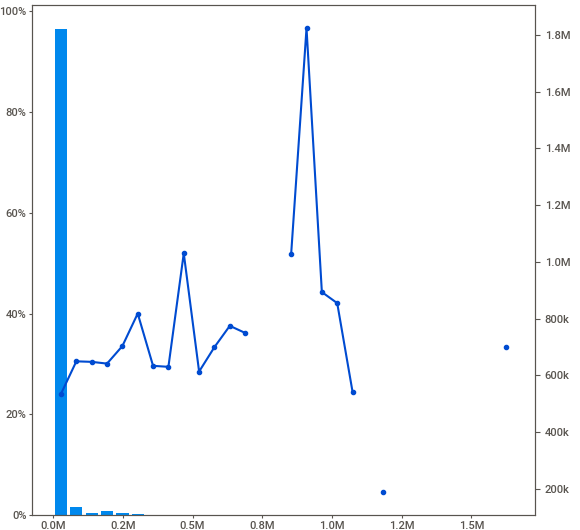
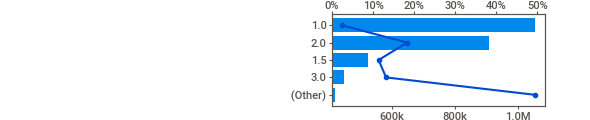
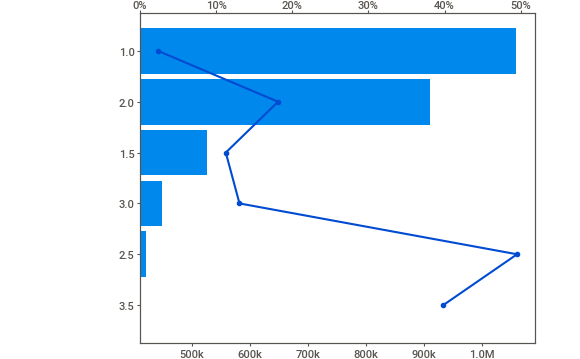
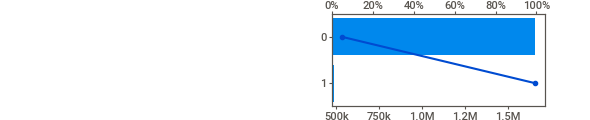
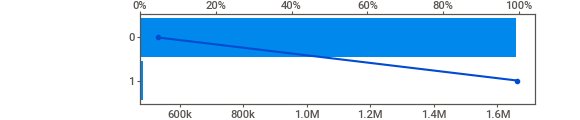
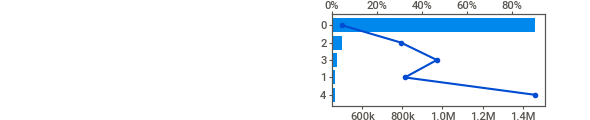
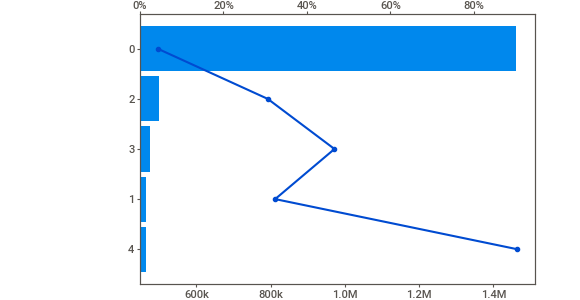
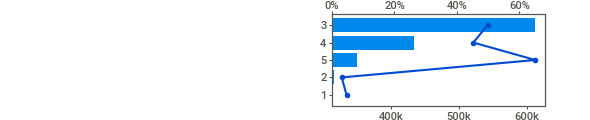
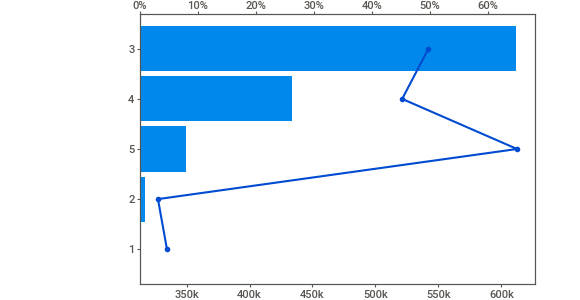
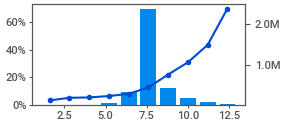
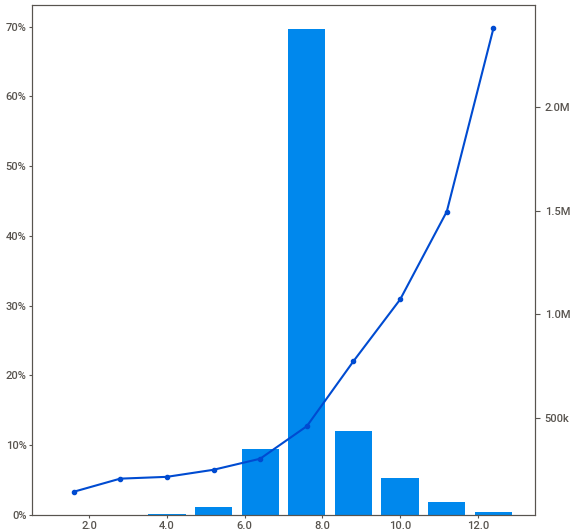
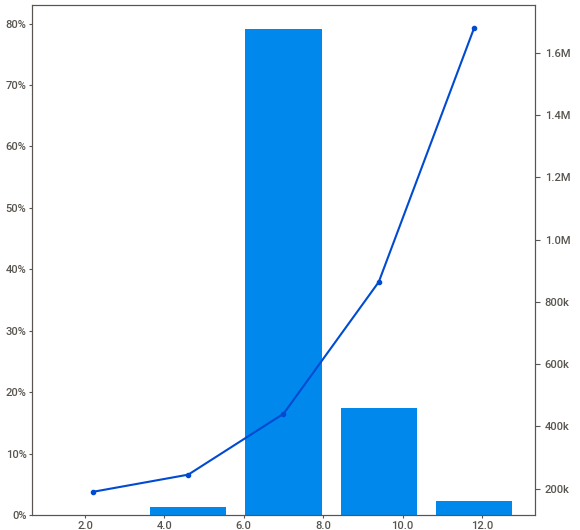
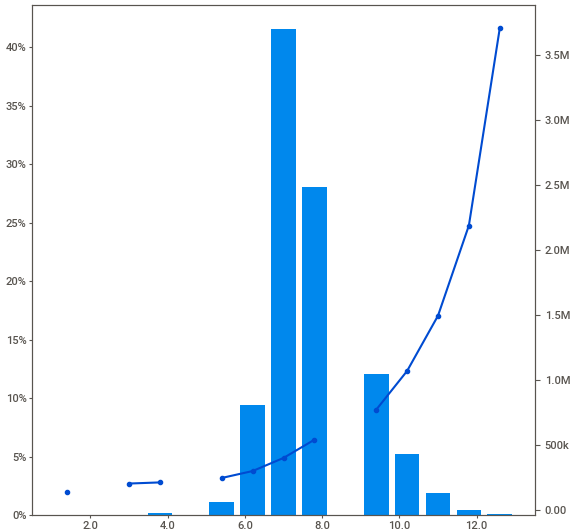
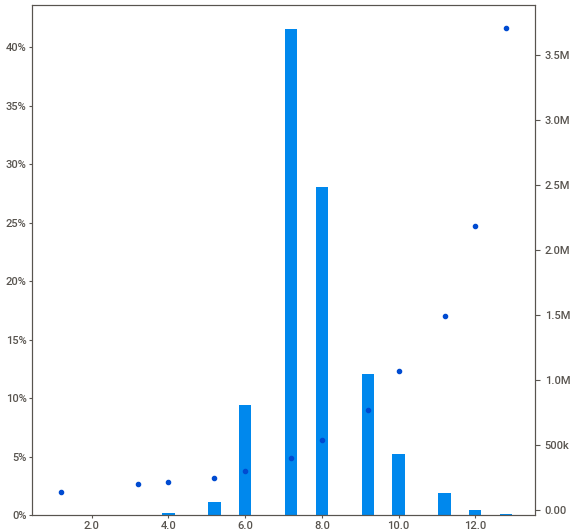
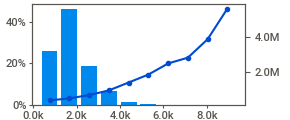
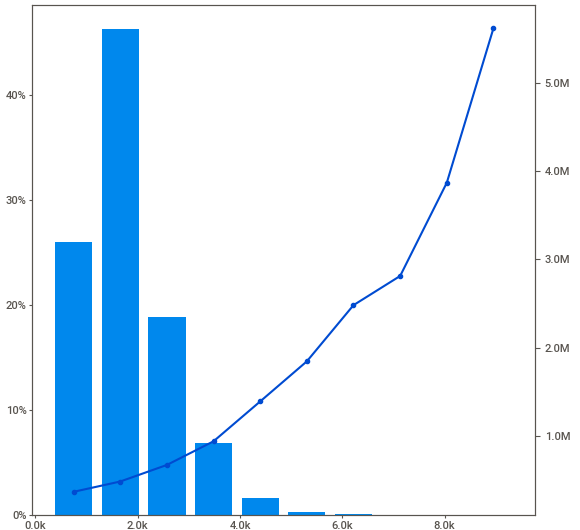
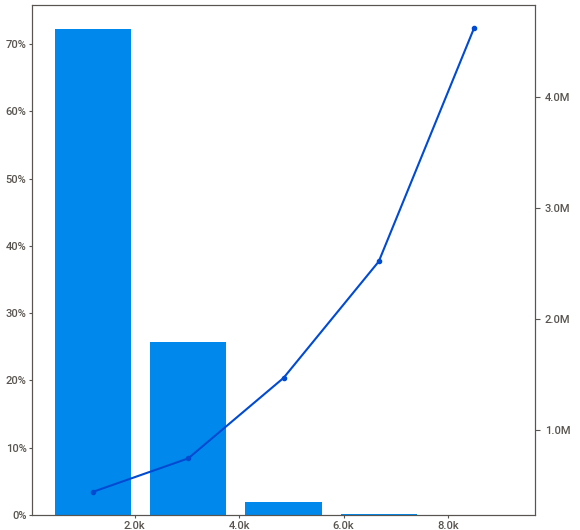
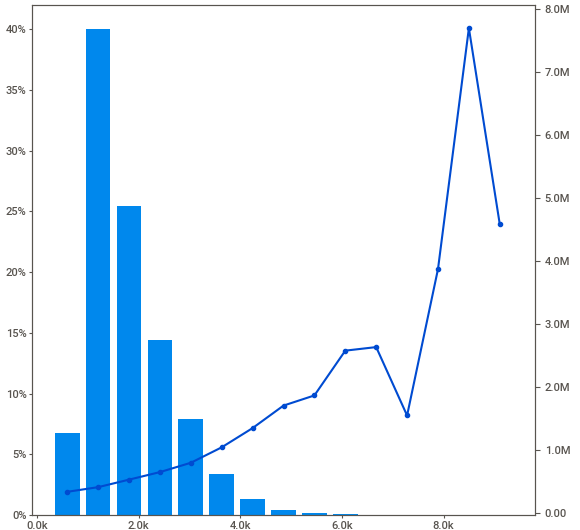
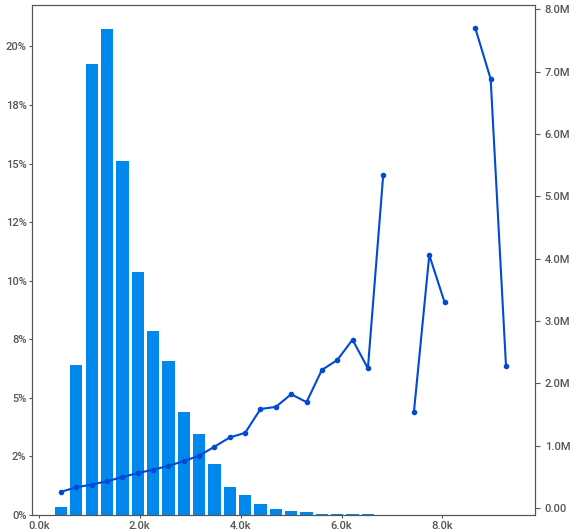
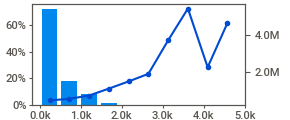
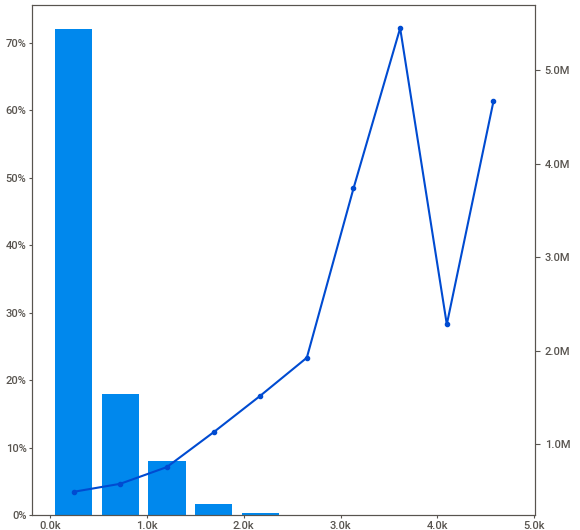
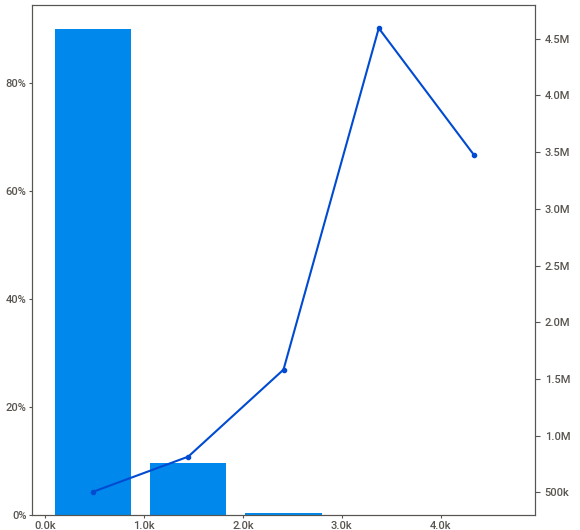
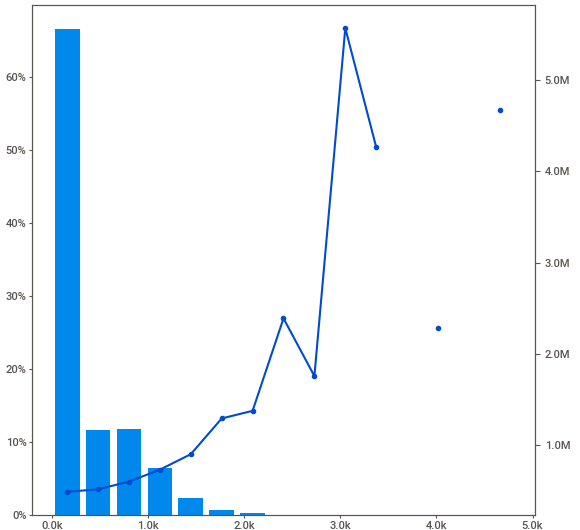
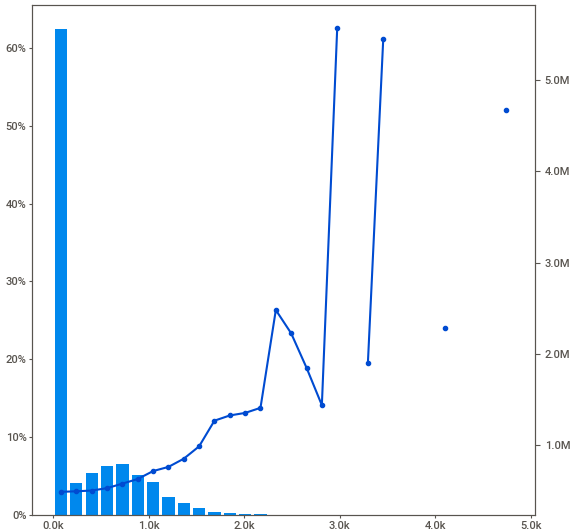
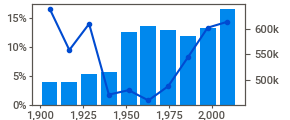
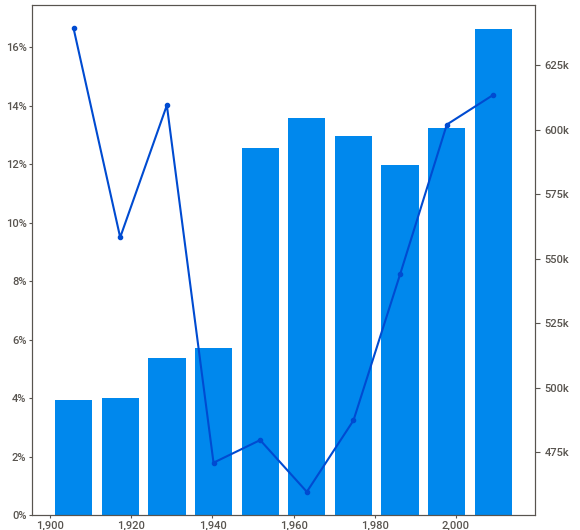
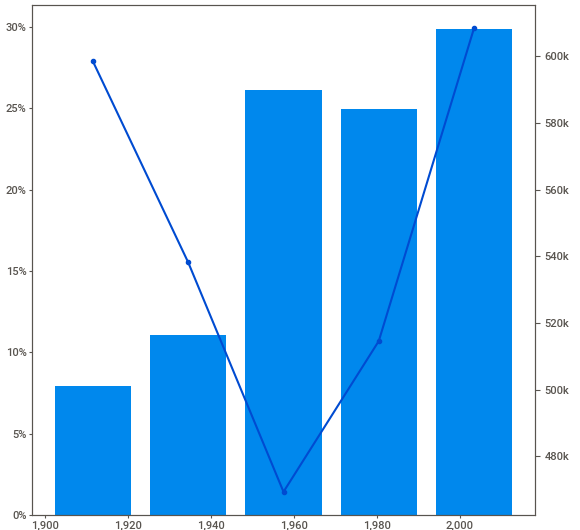
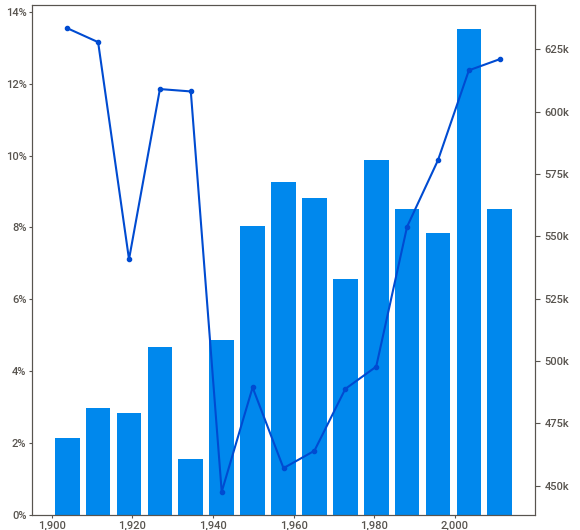
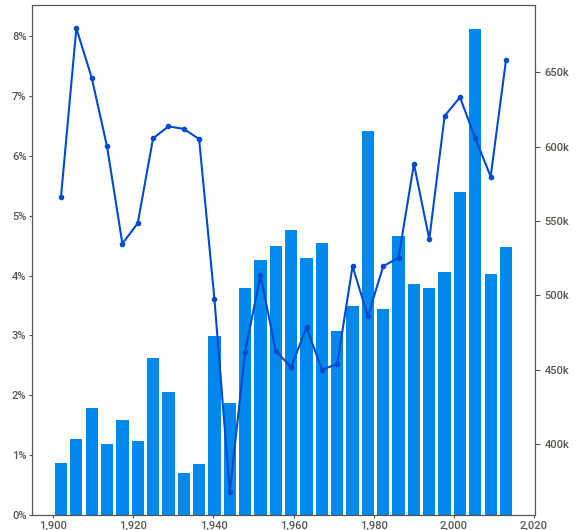
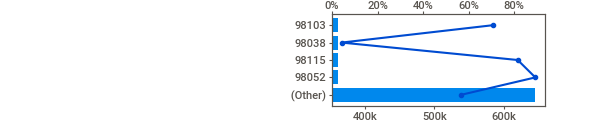
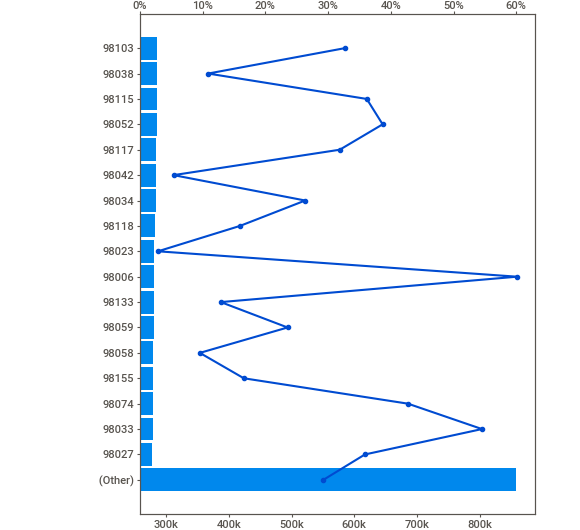
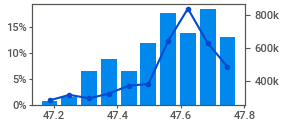
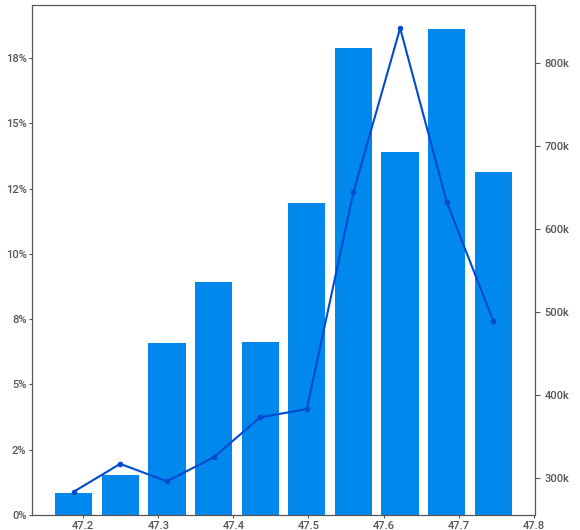
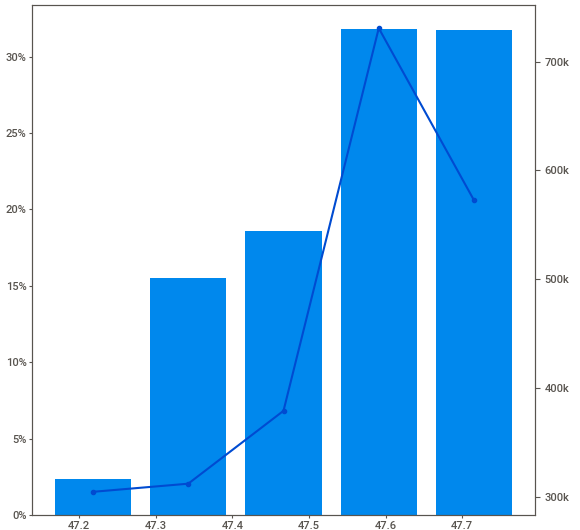
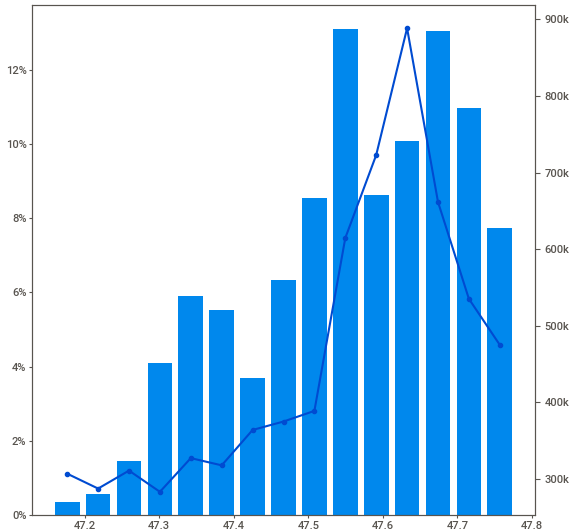
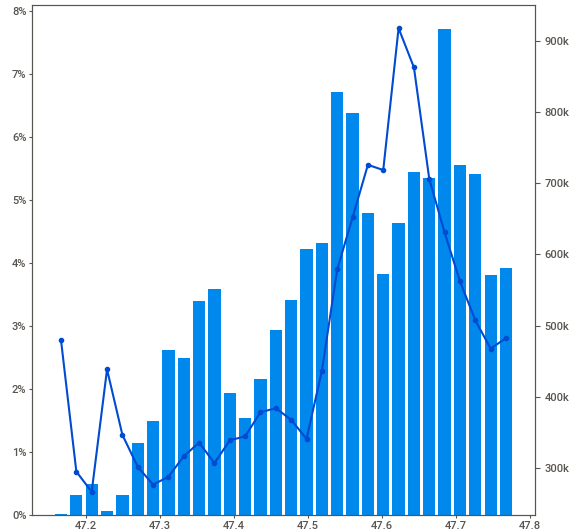
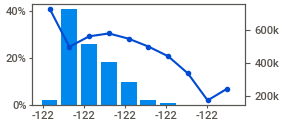
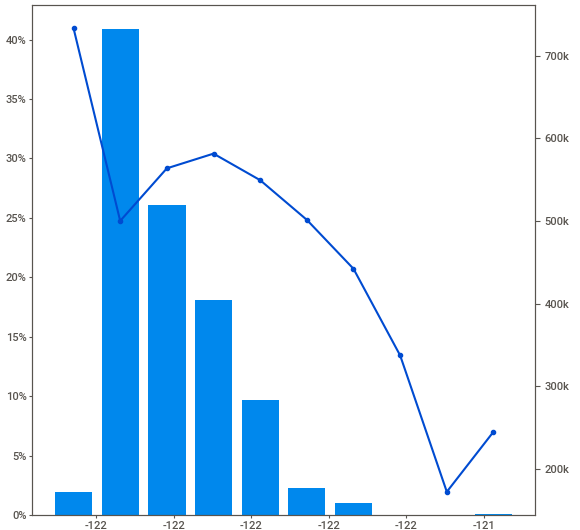
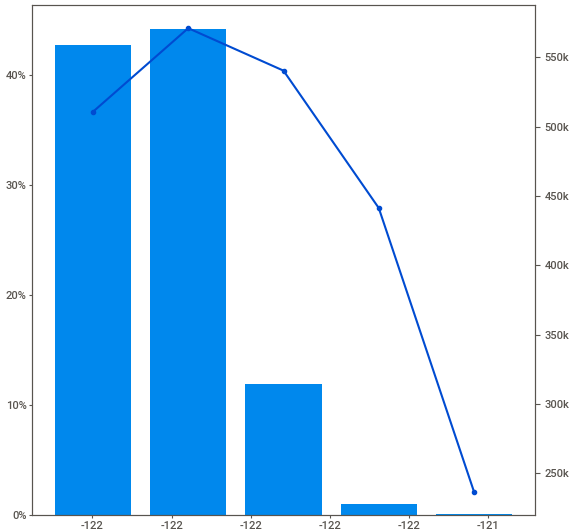
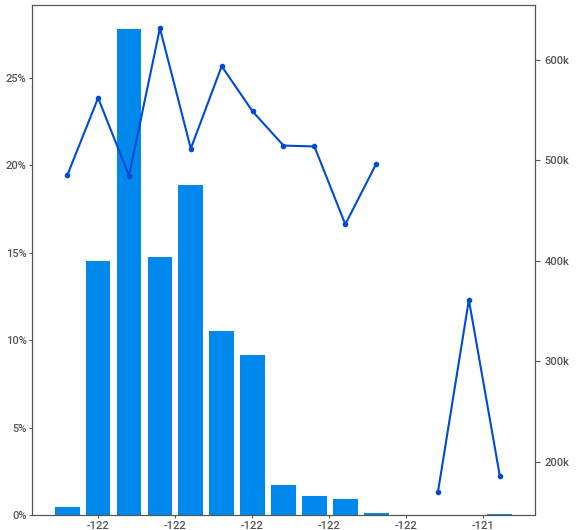
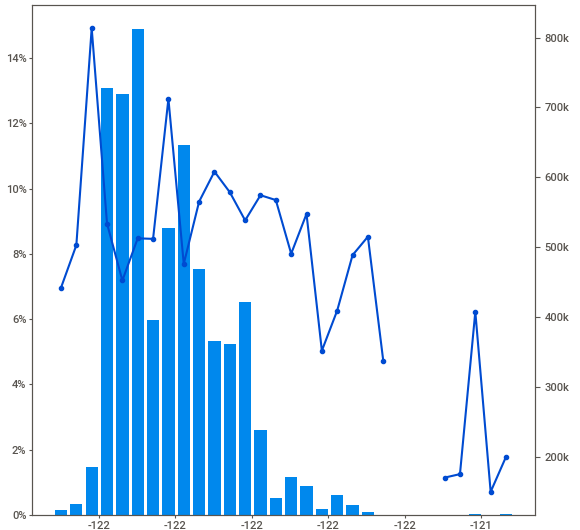
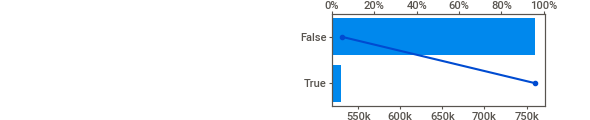
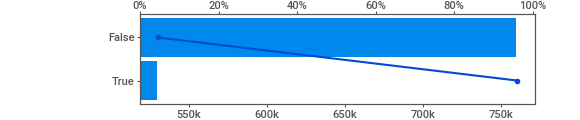
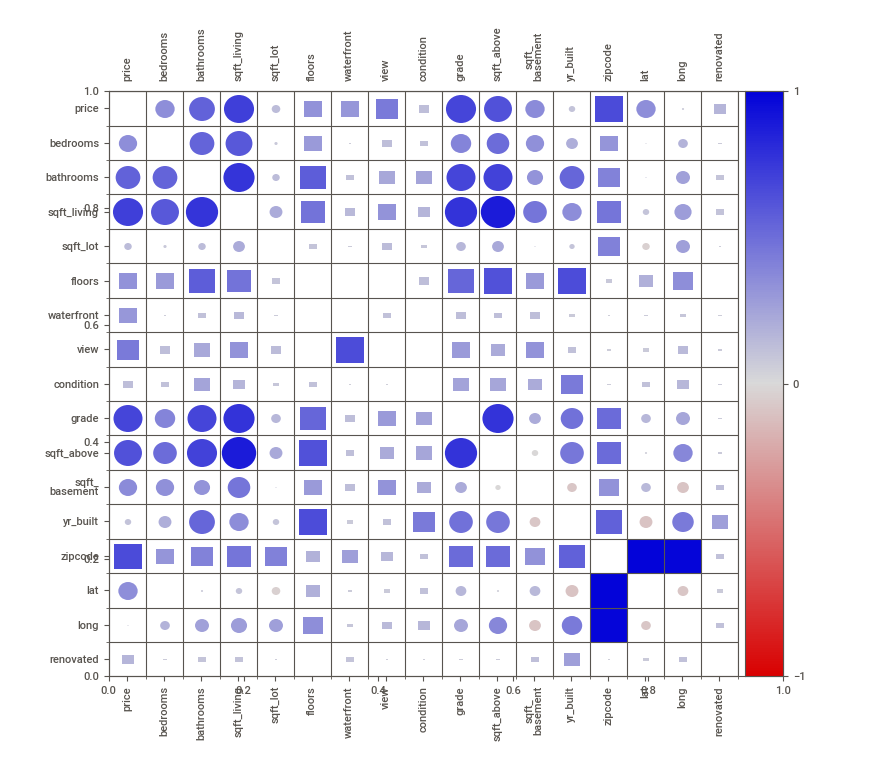
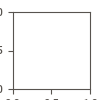

In [4]:
df_temp = df.copy()
df_temp = df_temp.drop(columns=["id", "sqft_living15", "sqft_lot15", "date"])
df_temp["renovated"] = df_temp["yr_renovated"] > 0
df_temp.drop(columns=["yr_renovated"], inplace=True)
df_temp[["waterfront", "view", "renovated", "zipcode"]] = df_temp[["waterfront", "view", "renovated", "zipcode"]].astype("category")

report = analyze(df_temp, target_feat="price")
report.show_notebook()
del df_temp

In [5]:
plt.style.use("ggplot")

In [6]:
# Prepocesamiento de la Data.
df_to_model = df.copy()
df_to_model = df_to_model.drop(columns=["id", "sqft_living15", "sqft_lot15", "date"])
df_to_model["renovated"] = df_to_model["yr_renovated"] > 0
df_to_model.drop(columns=["yr_renovated"], inplace=True)
df_to_model.drop_duplicates(inplace=True)

# Definimos variable objetivo y predictores. Tomamos además set de train y set de test.
X = df_to_model.drop(columns=["price"])
y = df_to_model["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [7]:
features_categoric = ["waterfront", "view", "renovated", "zipcode"]
features_numerical = [col for col in X.columns if col not in features_categoric]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), features_categoric),
        ("num", "passthrough", features_numerical)
    ]
)

### ***Modelo con XGBoost***

In [8]:
xgb_regressor_ = XGBRegressor()
xgb_regressor_.fit(X_train, y_train)

print(f"Train set score: {xgb_regressor_.score(X_train, y_train):.4f}")
print(f"Test set score:  {xgb_regressor_.score(X_test, y_test):.4f}")

Train set score: 0.9758
Test set score:  0.8693


R2 en Train: 0.8524
R2 en Test:  0.8425


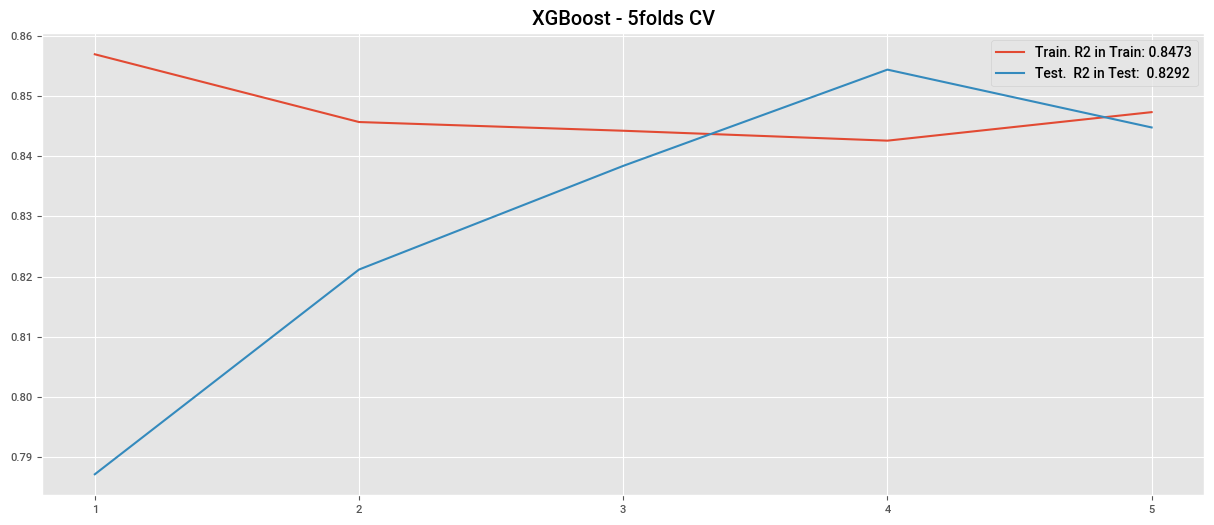

In [9]:
xgb_regressor1 = XGBRegressor(
    objective="reg:squarederror",
    max_depth=3,
    n_estimators=2000,
    learning_rate=0.0075,
    reg_alpha=300,
    reg_lambda=250,
    max_leaves=150,
    subsample=0.8,
)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", xgb_regressor1)
])

pipeline.fit(X_train, y_train)

print(f"R2 en Train: {pipeline.score(X_train, y_train):.4f}")
print(f"R2 en Test:  {pipeline.score(X_test, y_test):.4f}")

cv_xgb = cross_validate(
    pipeline,
    X_train,
    y_train,
    cv=5,
    scoring="r2",
    return_train_score=True
)

train_lr, test_lr = cv_xgb["train_score"], cv_xgb["test_score"]

plt.plot(cv_xgb["train_score"], label=f"Train. R2 in Train: {train_lr.mean():.4f}")
plt.plot(cv_xgb["test_score"], label=f"Test.  R2 in Test:  {test_lr.mean():.4f}")
plt.title("XGBoost - 5folds CV")
plt.xticks(np.arange(0,5), np.arange(1,6))
plt.legend()
plt.show()

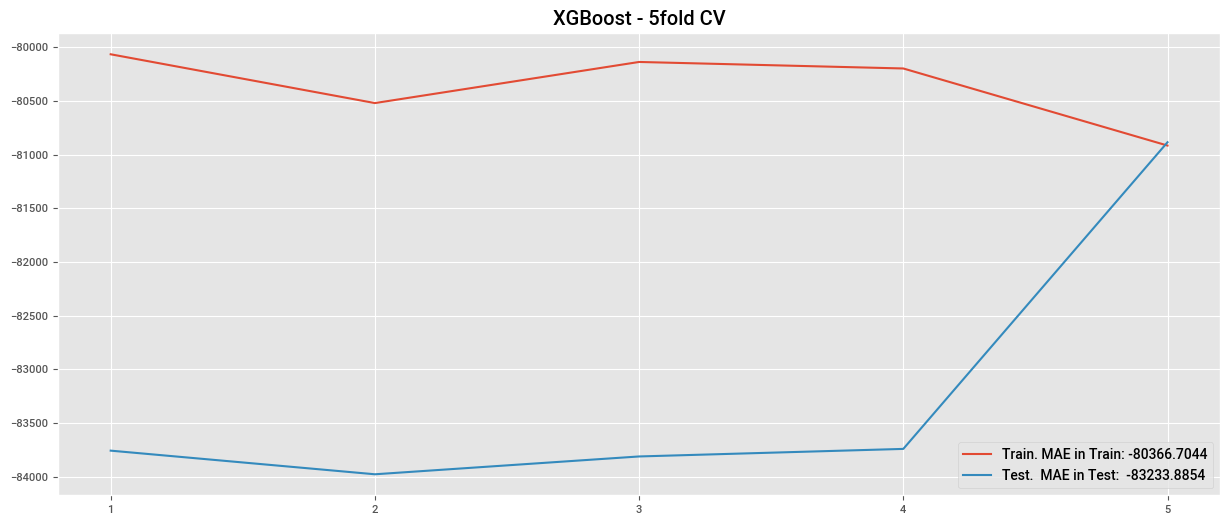

In [10]:
cv_xgb = cross_validate(
    pipeline,
    X_train,
    y_train,
    cv=5,
    scoring="neg_mean_absolute_error",
    return_train_score=True
)

train_lr, test_lr = cv_xgb["train_score"], cv_xgb["test_score"]


plt.plot(cv_xgb["train_score"], label=f"Train. MAE in Train: {train_lr.mean():.4f}")
plt.plot(cv_xgb["test_score"], label=f"Test.  MAE in Test:  {test_lr.mean():.4f}")
plt.title("XGBoost - 5fold CV")
plt.legend()
plt.xticks(np.arange(0,5), np.arange(1,6))
plt.show()

In [11]:
df_results_train = pd.DataFrame(
    {
        "true_value": y_train,
        "predicted_value": pipeline.predict(X_train)
    }
)

df_results_train["diff"] = abs(df_results_train["true_value"] - df_results_train["predicted_value"])
display(df_results_train.sort_values("diff", ascending=False).head(20))

df_results_test = pd.DataFrame(
    {
        "true_value": y_test,
        "predicted_value": pipeline.predict(X_test)
    }
)

df_results_test["diff"] = abs(df_results_test["true_value"] - df_results_test["predicted_value"])
df_results_test.sort_values("diff", ascending=False).head(20)

true_value  predicted_value         diff
7252    7700000.0      2900098.750  4799901.250
3914    7062500.0      3157875.000  3904625.000
9254    6885000.0      3147814.250  3737185.750
4411    5570000.0      3001758.750  2568241.250
1448    5350000.0      3159702.000  2190298.000
1315    5300000.0      3352317.500  1947682.500
1164    5110800.0      3348500.750  1762299.250
8638    4489000.0      2940750.000  1548250.000
8092    4668000.0      3306771.500  1361228.500
2626    4500000.0      3201104.250  1298895.750
9487    2375000.0      1127361.250  1247638.750
14139   2110000.0       906920.500  1203079.500
656     3070000.0      1873606.000  1196394.000
21372    490000.0      1649058.625  1159058.625
21576   3567000.0      2420243.250  1146756.750
19484   2395000.0      1282102.625  1112897.375
5449    2850000.0      1774158.625  1075841.375
7432    2575000.0      1506080.000  1068920.000
18482   3650000.0      2591424.500  1058575.500
19684   2205000.0      1175083.375  1029916.625

true_value  predicted_value          diff
12370   4208000.0     2.548266e+06  1.659734e+06
10446   3400000.0     1.952878e+06  1.447122e+06
7311    2500000.0     1.194972e+06  1.305028e+06
21050    900000.0     2.162562e+06  1.262562e+06
5617    2400000.0     1.201847e+06  1.198153e+06
19017   3800000.0     2.633888e+06  1.166112e+06
15258   3065000.0     1.920782e+06  1.144218e+06
13256   2546000.0     1.486281e+06  1.059719e+06
16302   3710000.0     2.653926e+06  1.056074e+06
10373   2983000.0     1.972321e+06  1.010679e+06
11535   3200000.0     2.200603e+06  9.993970e+05
19858   2700000.0     1.731232e+06  9.687684e+05
13020   2300000.0     1.371136e+06  9.288639e+05
5880    3418800.0     2.559992e+06  8.588085e+05
20295   3204000.0     2.347220e+06  8.567798e+05
10539   1700000.0     8.463644e+05  8.536356e+05
17558   2510000.0     1.658604e+06  8.513959e+05
15668   1680000.0     2.502938e+06  8.229380e+05
10468   2000000.0     1.182735e+06  8.172651e+05
11278   2100000.0     1.284781e+06  8.152186e+05

#### ***Busqueda de Hiperparametros xgb***

In [ ]:
xgb_regressor = XGBRegressor(objective="reg:squarederror")

pipeline_xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", xgb_regressor)
])

param_distributions = {
    "model__max_depth": [3, 4, 5, 6],
    "model__n_estimators": [100, 500, 1000],
    "model__learning_rate": [0.0075, 0.01, 0.05],
    "model__reg_alpha": [0, 5, 10, 15, 20],
    "model__reg_lambda": [1, 10, 20, 30],
    "model__subsample": [0.6, 0.8, 1.0],
    "model__max_leaves": [100, 200, 300, 500]
}

random_search_xgb = RandomizedSearchCV(
    estimator=pipeline_xgb,
    param_distributions=param_distributions,
    n_iter=10,
    scoring="r2",
    cv=5,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

random_search_xgb.fit(X_train, y_train)

print("Best parameters found: ", random_search_xgb.best_params_)
print(f"Best CV score: {random_search_xgb.best_score_}")

best_model = random_search_xgb.best_estimator_
print(f"R2 en Train: {best_model.score(X_train, y_train):.4f}")
print(f"R2 en Test:  {best_model.score(X_test, y_test):.4f}")

pd.DataFrame(random_search_xgb.cv_results_)

Best parameters found:  {'model__subsample': 0.8, 'model__reg_lambda': 1, 'model__reg_alpha': 10, 'model__n_estimators': 1000, 'model__max_leaves': 300, 'model__max_depth': 3, 'model__learning_rate': 0.05}
Best CV score: 0.8905389750992884
R2 en Train: 0.9461
R2 en Test:  0.8828


## ***LightGBM (Light Gradient Boosting Machine)***

**LightGBM** es una implementación de Gradient Boosting diseñada para ser **rápida, eficiente en el uso de memoria** y capaz de manejar grandes volúmenes de datos con alta dimensionalidad. Es particularmente adecuada para problemas donde la velocidad y la escalabilidad son críticas.

#### ***Características principales***

1. **Crecimiento de árboles basado en hojas (leaf-wise):**
   - A diferencia de XGBoost, LightGBM divide las hojas con mayor ganancia en cada iteración, lo que puede generar árboles más profundos y precisos.
   - **Ventaja:** Mejora la eficiencia del modelo, especialmente en datos grandes.
   - **Desafío:** Mayor riesgo de sobreajuste en conjuntos de datos pequeños.

2. **Divisiones basadas en histogramas:**
   - Agrupa los valores continuos en histogramas, reduciendo significativamente el tiempo de cómputo.

3. **Soporte nativo para variables categóricas:**
   - Permite manejar variables categóricas directamente, sin necesidad de codificación adicional.

4. **Uso eficiente de memoria:**
   - Consume menos memoria que XGBoost gracias a su diseño basado en histogramas.

#### ***Hiperparámetros principales y su uso recomendado***

1. **`learning_rate` (Coeficiente de aprendizaje):**
   - Controla la magnitud de las actualizaciones en cada iteración.
   - **Recomendación:** Usar valores bajos (`0.01` a `0.1`) y compensar con un número alto de árboles (`num_iterations`).

2. **`max_depth` (Profundidad máxima):**
   - Limita la profundidad de los árboles para evitar sobreajuste.
   - **Recomendación:** Usar `-1` para desactivar la limitación, o valores bajos (`5` a `10`) para datos con ruido.

3. **`num_leaves` (Número máximo de hojas):**
   - Controla la cantidad de divisiones posibles en un árbol.
   - **Recomendación:** 
     - Valores iniciales como $2^{\text{max\_depth}} - 1$.
     - Reducir este valor si hay sobreajuste.

4. **`min_child_samples` (Tamaño mínimo de muestra en hojas):**
   - Número mínimo de datos requeridos para crear una hoja.
   - **Impacto:** Ayuda a controlar hojas pequeñas que pueden sobreajustarse a los datos de entrenamiento.
   - **Recomendación:**
     - Para datos grandes: `20` a `100`.
     - Para datos pequeños: `5` a `20`.
   - **Consejo:** Incrementar este valor si el modelo muestra signos de sobreajuste.

5. **`min_data_in_leaf` (Tamaño mínimo de muestra en hojas):**
   - Evita hojas muy pequeñas que pueden causar sobreajuste.
   - **Recomendación:** 
     - Para datos grandes: `20` a `50`.
     - Para datos pequeños: `10` o menos.

6. **`feature_fraction` (Fracción de características por árbol):**
   - Porcentaje de características utilizadas en cada iteración.
   - **Recomendación:** Valores de `0.7` a `1.0`.

7. **`bagging_fraction` (Fracción de datos por iteración):**
   - Controla la proporción de datos de entrenamiento utilizados en cada árbol.
   - **Recomendación:** 
     - `0.7` a `0.9` para reducir el riesgo de sobreajuste.
     - Usar junto con `bagging_freq` para habilitar el muestreo.

8. **`reg_alpha` (Regularización L1):**
   - Introduce una penalización L1 que fomenta la esparsidad en los pesos de las hojas, eliminando aquellas que son menos relevantes.
   - **Impacto:** Reduce el número de hojas efectivas en los árboles.
   - **Recomendación:** 
     - Comenzar con valores bajos como `0.0` o `1.0` y ajustar según el desempeño del modelo.

9. **`reg_lambda` (Regularización L2):**
   - Controla la penalización L2 sobre los pesos de las hojas, reduciendo su magnitud.
   - **Impacto:** Suaviza las predicciones y previene que los pesos de las hojas crezcan demasiado.
   - **Recomendación:** 
     - Valores iniciales entre `0.0` y `10.0`.
     - Incrementar si el modelo muestra sobreajuste.

10. **`min_gain_to_split` (Ganancia mínima para división):**
   - Controla las divisiones insignificantes en los árboles.
   - **Recomendación:** 
     - Valores de `0.0` (sin penalización) a `0.1` para datos más complejos.

#### ***Estrategia para el ajuste de hiperparámetros***

1. **Comenzar con valores predeterminados:**
   - LightGBM tiene configuraciones predeterminadas que suelen ser efectivas.
   - Ajustar primero `learning_rate`, `num_leaves`, y `max_depth`.

2. **Validación cruzada:**
   - Utilizar validación cruzada para medir el rendimiento y detectar sobreajuste o subajuste.

3. **Pruebas de bagging y fracciones de características:**
   - Probar con `bagging_fraction` y `feature_fraction` para reducir el tiempo de entrenamiento y mejorar la generalización.

4. **Exploración con Grid Search o Random Search:**
   - Probar combinaciones sistemáticas o aleatorias de hiperparámetros para encontrar la mejor configuración.

### ***Modelo LigthGBM***

In [13]:
lgbm = LGBMRegressor(verbose=-1)

pipeline_lgbm = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", lgbm)
])

pipeline_lgbm.fit(X_train, y_train)
print(pipeline_lgbm.score(X_train, y_train))
print(pipeline_lgbm.score(X_test, y_test))

0.9392381025286636
0.8792562594391012


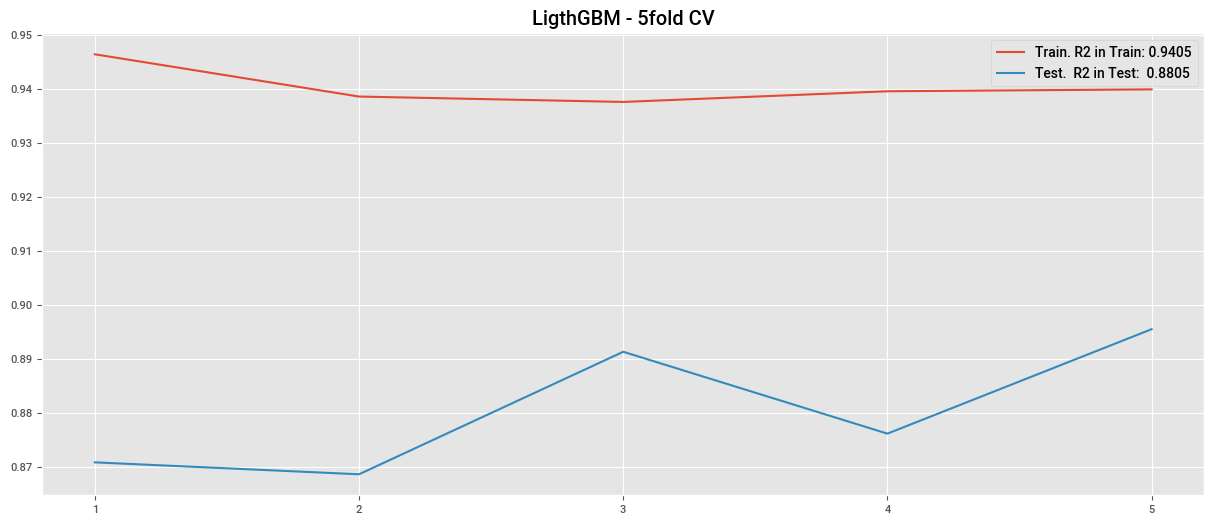

In [14]:
cv_lgbm = cross_validate(
    lgbm,
    X_train,
    y_train,
    cv=5,
    scoring="r2",
    return_train_score=True
)


plt.plot(cv_lgbm["train_score"], label=f"Train. R2 in Train: {cv_lgbm['train_score'].mean():.4f}")
plt.plot(cv_lgbm["test_score"], label=f"Test.  R2 in Test:  {cv_lgbm['test_score'].mean():.4f}")
plt.title("LigthGBM - 5fold CV")
plt.legend()
plt.xticks(np.arange(0,5), np.arange(1,6))
plt.show()

In [15]:
lgbm1 = LGBMRegressor(
    objective="regression",
    reg_alpha=25,
    min_child_samples=150,
    max_depth=4,    
    reg_lambda=30
    
)

pipeline_lgbm1 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", lgbm1)
])

pipeline_lgbm1.fit(X_train, y_train)

print(pipeline_lgbm1.score(X_train, y_train))
print(pipeline_lgbm1.score(X_test, y_test))

0.8438249657130915
0.8468238962295872


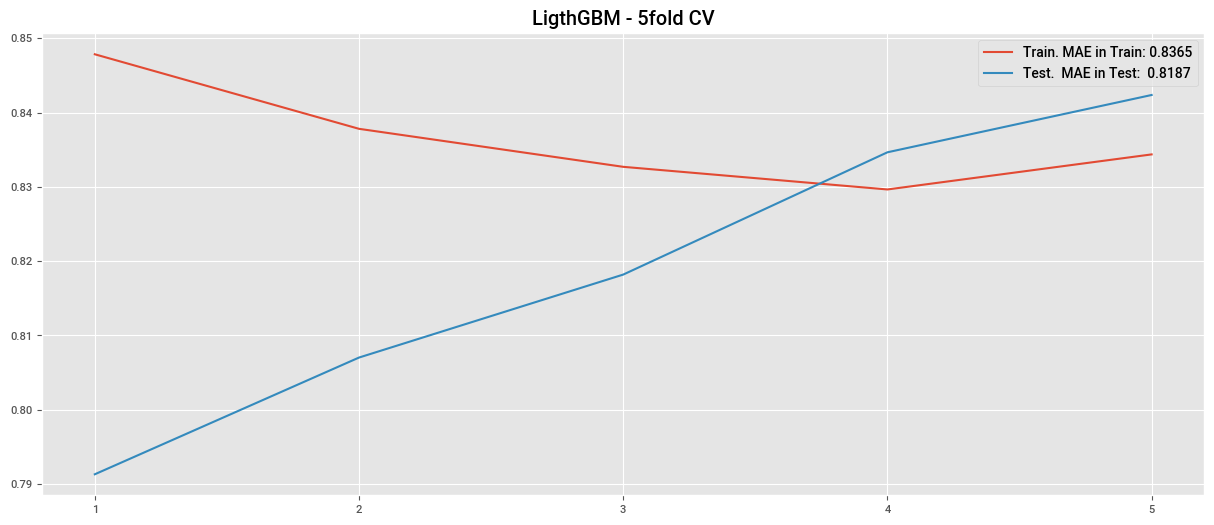

In [16]:
cv_lgbm1 = cross_validate(
    pipeline_lgbm1,
    X_train,
    y_train,
    cv=5,
    scoring="r2",
    return_train_score=True
)

plt.plot(cv_lgbm1["train_score"], label=f"Train. MAE in Train: {cv_lgbm1['train_score'].mean():.4f}")
plt.plot(cv_lgbm1["test_score"], label=f"Test.  MAE in Test:  {cv_lgbm1['test_score'].mean():.4f}")
plt.title("LigthGBM - 5fold CV")
plt.legend()
plt.xticks(np.arange(0,5), np.arange(1,6))
plt.show()

In [17]:
lgbm2 = LGBMRegressor(
    objective="gamma",
    reg_alpha=2,
    min_child_samples=300,
    learning_rate=0.0075,
    reg_lambda=10,
    n_estimators=1500,
    max_depth=3,
    subsample=0.9,
    subsample_for_bin=1000,
    num_leaves=300,
    n_jobs=-1,
)

pipeline_lgbm2 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", lgbm2)
])

pipeline_lgbm2.fit(X_train, y_train)

print(pipeline_lgbm2.score(X_train, y_train))
print(pipeline_lgbm2.score(X_test, y_test))

0.8239901867809278
0.8315345203942487


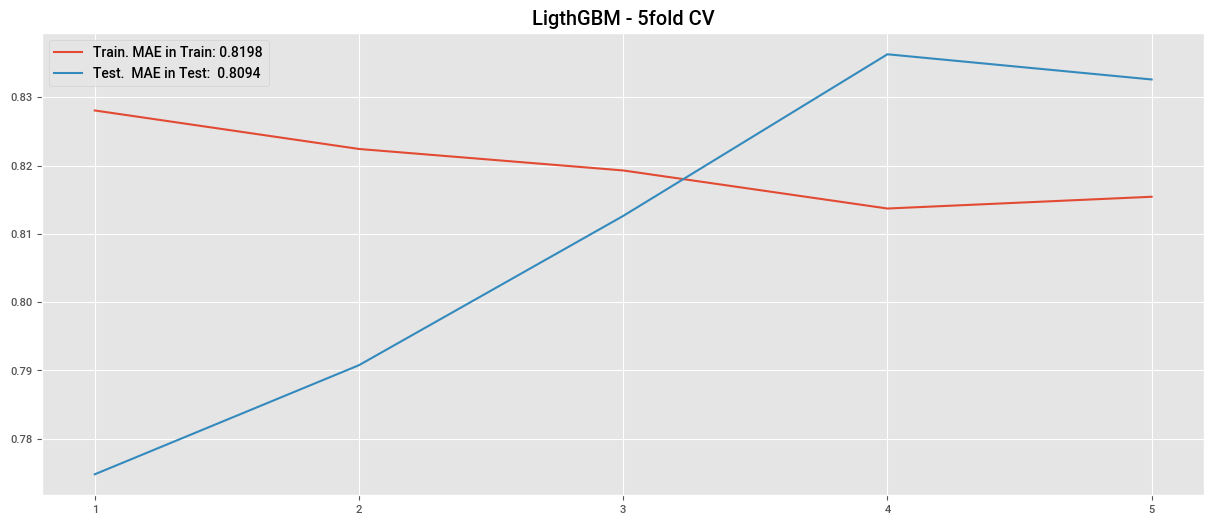

In [18]:
cv_lgbm2 = cross_validate(
    pipeline_lgbm2,
    X_train,
    y_train,
    cv=5,
    scoring="r2",
    return_train_score=True
)

plt.plot(cv_lgbm2["train_score"], label=f"Train. MAE in Train: {cv_lgbm2['train_score'].mean():.4f}")
plt.plot(cv_lgbm2["test_score"], label=f"Test.  MAE in Test:  {cv_lgbm2['test_score'].mean():.4f}")
plt.title("LigthGBM - 5fold CV")
plt.legend()
plt.xticks(np.arange(0,5), np.arange(1,6))
plt.show()

In [ ]:
px.scatter(
    pd.DataFrame(
        {
            "true_value": y_test,
            "predicted": pipeline_lgbm2.predict(X_test)
        }
    ),
    x="true_value",
    y="predicted",
    title="Prediccion VS Valor Real"
).show()

0.8293522503882406
0.8401752759961569


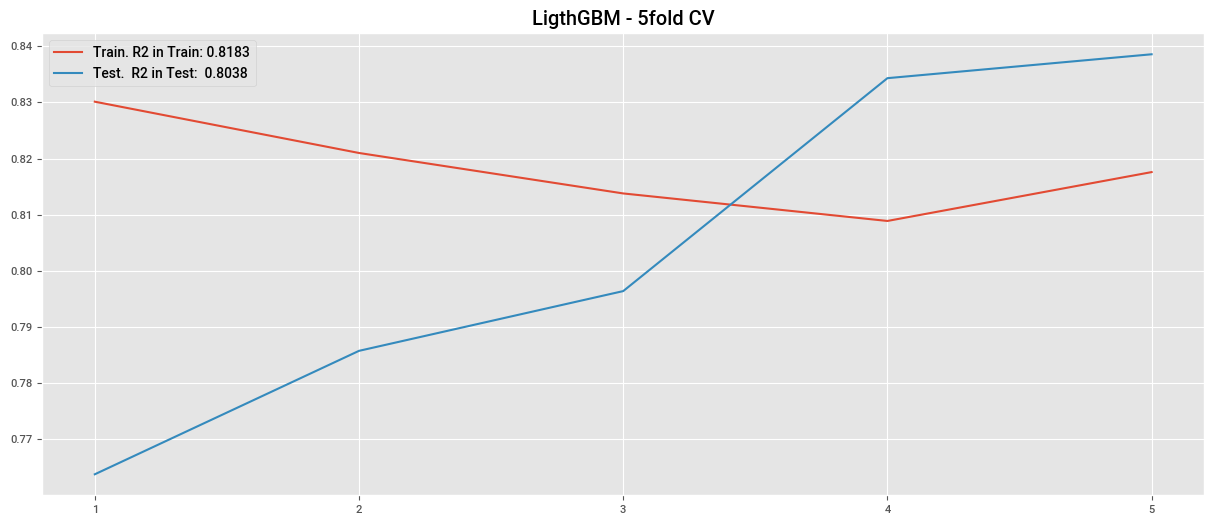

In [ ]:
lgbm3 = LGBMRegressor(
    objective="gamma",
    reg_alpha=2,
    min_child_samples=200,
    learning_rate=0.01,
    n_estimators=500,    
    max_depth=6,
    subsample=0.9,
    verbose=-1,
)

pipeline_lgbm3 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", lgbm3)
])

pipeline_lgbm3.fit(X_train, y_train)

print(pipeline_lgbm3.score(X_train, y_train))
print(pipeline_lgbm3.score(X_test, y_test))

cv_lgbm3 = cross_validate(
    pipeline_lgbm3,
    X_train,
    y_train,
    cv=5,
    scoring=("r2"),
    return_train_score=True
)

plt.plot(cv_lgbm3["train_score"], label=f"Train. R2 in Train: {cv_lgbm3['train_score'].mean():.4f}")
plt.plot(cv_lgbm3["test_score"], label=f"Test.  R2 in Test:  {cv_lgbm3['test_score'].mean():.4f}")
plt.title("LigthGBM - 5fold CV")
plt.legend()
plt.xticks(np.arange(0,5), np.arange(1,6))
plt.show()

In [ ]:
lgbm = LGBMRegressor(verbose=-1)

pipeline_lgbm = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", lgbm)
])

param_distributions_lgbm = {
    "model__objective": ["regression", "gamma"],
    "model__num_leaves": [20, 31, 50, 100, 200],
    "model__learning_rate": [0.005, 0.0075, 0.01, 0.02, 0.05],
    "model__n_estimators": [100, 300, 500, 1000, 2000],
    "model__max_depth": [2, 3, 4, 5],
    "model__min_child_samples": [150, 155, 165, 175, 190, 200],
    "model__min_split_gain": [0.0, 0.1, 0.2, 0.5],
    "model__subsample": [0.7, 0.8, 0.9],
    "model__reg_alpha": [1, 5, 10, 20],
    "model__reg_lambda": [1, 5, 10, 20],
}

random_search_lgbm = RandomizedSearchCV(
    estimator=pipeline_lgbm,
    param_distributions=param_distributions_lgbm,
    n_iter=5,
    scoring="r2",
    cv=5,
    verbose=3,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

random_search_lgbm.fit(X_train, y_train)

print("Best parameters found: ", random_search_lgbm.best_params_)
print(f"Best CV score: {random_search_lgbm.best_score_:.4f}")

pd.DataFrame(random_search_lgbm.cv_results_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


## ***CatBoost (Categorical Boosting)***

***CatBoost*** es una implementación avanzada de Gradient Boosting desarrollada por **[Yandex](https://yandex.com/dev/catboost/)**, especializada en manejar variables categóricas de manera eficiente. Destaca por su facilidad de uso, configuraciones predeterminadas robustas y capacidad para evitar el sobreajuste.

#### ***Características principales***

1. ***Soporte nativo para variables categóricas:***
   - A diferencia de otras bibliotecas, CatBoost maneja variables categóricas directamente, utilizando codificaciones como *mean encoding* supervisado de forma segura.

2. ***Boosting basado en órdenes:***

   - En lugar de entrenar con los datos en su orden natural, utiliza permutaciones para mejorar la estabilidad y reducir el riesgo de sobreajuste.

3. ***Optimización eficiente:***
   - Compatible con procesamiento en GPU, lo que acelera el entrenamiento en grandes conjuntos de datos.

4. ***Robustez frente a valores faltantes:***
   - Puede manejar datos faltantes directamente, sin necesidad de preprocesarlos.

#### ***Hiperparámetros principales y su uso recomendado***

1. **`learning_rate` (Coeficiente de aprendizaje):**
   - Controla la magnitud de las actualizaciones en cada iteración.
   - **Recomendación:** Usar valores bajos (`0.01` a `0.1`) para evitar sobreajuste, especialmente en datos pequeños.

2. **`depth` (Profundidad máxima):**
   - Define la profundidad máxima de los árboles.
   - **Recomendación:** 
     - Valores entre `6` y `10` funcionan bien para la mayoría de los casos.
     - Reducir este valor para datos pequeños o con ruido.

3. **`iterations` (Número de iteraciones o árboles):**
   - Determina cuántos árboles se entrenan secuencialmente.
   - **Recomendación:** 
     - Usar valores entre `500` y `1000` para modelos precisos.
     - Ajustar según el `learning_rate`: más iteraciones para valores bajos.

4. **`l2_leaf_reg` (Regularización L2):**
   - Controla la penalización L2 aplicada a los pesos de las hojas.
   - **Recomendación:** 
     - Comenzar con valores entre `3` y `10`.
     - Incrementar si se observa sobreajuste.

5. **`bagging_temperature`:**
   - Controla la aleatoriedad en la selección de muestras para cada iteración.
   - **Recomendación:** 
     - Usar valores bajos (`0.0` a `1.0`) para datos grandes.
     - Incrementar para datos más pequeños o ruidosos.

6. **`border_count`:**
   - Define el número de divisiones utilizadas para variables numéricas.
   - **Recomendación:** 
     - Comenzar con `128`.
     - Reducir para conjuntos de datos pequeños o si el tiempo de entrenamiento es un problema.


#### ***Estrategia para el ajuste de hiperparámetros***

1. ***Comenzar con configuraciones predeterminadas:***
   - CatBoost tiene parámetros predeterminados sólidos que funcionan bien en muchos problemas.

2. **Ajustar iteraciones y `learning_rate`:**
   - Usar un valor bajo de `learning_rate` (`0.01` a `0.1`) y aumentar las iteraciones para lograr un ajuste más preciso.

3. **Probar diferentes profundidades (`depth`):**
   - Probar valores entre `6` y `10` dependiendo de la complejidad de los datos.

4. **Usar validación cruzada:**
   - Evaluar el modelo en varias particiones para detectar sobreajuste o subajuste.

5. **Explorar con Grid Search o Random Search:**
   - Probar combinaciones de parámetros clave como `depth`, `l2_leaf_reg`, y `bagging_temperature`.

### ***Modelo con CatBoostRegressor.***


R2 en Train: 0.8137
R2 en Test:  0.8018


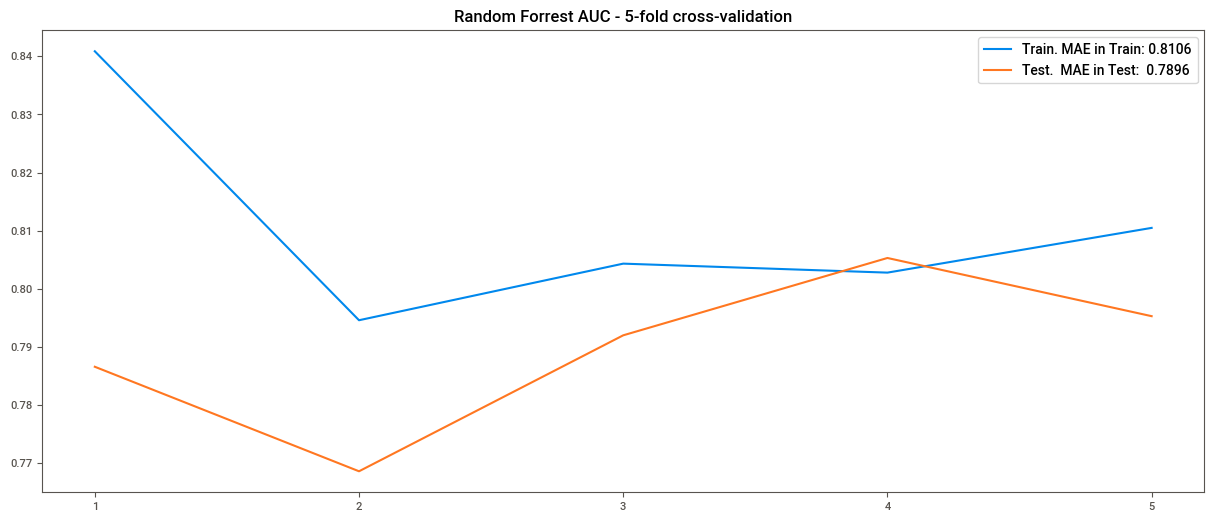

In [ ]:
catboost = CatBoostRegressor(
    loss_function="RMSE",
    cat_features=features_categoric,
    learning_rate=0.0075,
    n_estimators=2500,
    min_child_samples=150,
    reg_lambda=150,
    max_depth=3,
    subsample=0.8,
    random_state=42,
    verbose=0
)

catboost.fit(X_train, y_train)

print(f"\nR2 en Train: {catboost.score(X_train, y_train):.4f}")
print(f"R2 en Test:  {catboost.score(X_test, y_test):.4f}")

df_plot = pd.DataFrame({"true_value": y_test, "predicted": catboost.predict(X_test)})
px.scatter(df_plot, x="true_value", y="predicted")

cv_catboost = cross_validate(
    catboost,
    X_train,
    y_train,
    cv=5,
    scoring="r2",
    return_train_score=True
)

plt.plot(cv_catboost["train_score"], label=f"Train. MAE in Train: {cv_catboost['train_score'].mean():.4f}")
plt.plot(cv_catboost["test_score"], label=f"Test.  MAE in Test:  {cv_catboost['test_score'].mean():.4f}")
plt.title("CatBoostRegressor - 5-fold cross-validation")
plt.legend()
plt.xticks(np.arange(0,5), np.arange(1,6))
plt.show()

In [ ]:
pipeline_catboost = Pipeline(steps=[
    ("model", catboost)
])

pipeline_catboost.fit(X_train, y_train)

print(pipeline_catboost.score(X_train, y_train))
print(pipeline_catboost.score(X_test, y_test))

0.8137006861318932
0.8017986205122258


In [ ]:
catboost = CatBoostRegressor(cat_features=features_categoric, verbose=0)

pipeline_catboost = Pipeline(steps=[
    ("model", catboost)
])

param_distributions = {
    "model__iterations": [100, 300, 500, 1000, 2000],
    "model__learning_rate": [0.005, 0.075, 0.01, 0.02, 0.05],
    "model__depth": [2, 3, 4, 5, 6],
    "model__l2_leaf_reg": [1, 3, 5, 7, 9],
    "model__bagging_temperature": [0, 0.1, 0.2, 0.5, 1.0],
    "model__loss_function": ["MAE", "RMSE", "MAPE"]
}

random_search_catboost = RandomizedSearchCV(
    estimator=pipeline_catboost,
    param_distributions=param_distributions,
    n_iter=5,
    scoring="r2",
    cv=5,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

random_search_catboost.fit(X_train, y_train)

print("Best parameters found: ", random_search_catboost.best_params_)
print("Best CV score R2: ", random_search_catboost.best_score_)

best_model = random_search_catboost.best_estimator_
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

pd.DataFrame(random_search_catboost.cv_results_)